# Vendas

## Pipeline

Etapa 01: Instalar e Importar as Bibliotecas

Etapa 02: Obter o Datasource

Etapa 03: Exibir os Dados, Metadados e Estat√≠sticas

Etapa 04: Extract, Transform, Load (ETL)

Etapa 05: Exploratory Data Analysis (EDA)

Etapa 06: Identifica√ß√£o dos Outliers

Etapa 07: Preprocessamento de Dados (Regras, Codifica√ß√£o e Normaliza√ß√£o)

Etapa 08: Redu√ß√£o da Dimensionalidade

Etapa 09: Clusteriza√ß√£o

Etapa 10: Rotulagem

Etapa 11: Prepara√ß√£o dos Dados para o Aprendizado de M√°quina

Etapa 12: Escolha dos Hiperpar√¢metros dos Modelos

Etapa 13: Competi√ß√£o de Modelos

Etapa 14: Produ√ß√£o (Deploy)

## Defini√ß√£o dos Atributos

In [ ]:
# ID_Venda: Este campo √© um identificador √∫nico para cada transa√ß√£o realizada, funcionando como um n√∫mero de refer√™ncia para a venda. Ele ajuda a diferenciar e rastrear cada venda individualmente no dataset.
# Data_Venda: Indica a data em que a venda foi realizada. Esse campo permite an√°lises temporais, como tend√™ncias de vendas ao longo de per√≠odos espec√≠ficos ou sazonalidade.
# ID_Produto: Este √© o identificador √∫nico de cada produto vendido. Ele permite a associa√ß√£o de transa√ß√µes com produtos espec√≠ficos e possibilita an√°lises de desempenho de cada produto.
# Quantidade: Representa o n√∫mero de unidades de um determinado produto que foram vendidas na transa√ß√£o. Esse campo pode ajudar a entender volumes de vendas e padr√µes de consumo por transa√ß√£o. Neste dataset, podem haver valores nulos (ausentes) ou outliers (quantidades fora do padr√£o usual), que precisam de aten√ß√£o em an√°lises.
# Preco_Unitario: Indica o pre√ßo de cada unidade do produto no momento da venda. Esse campo pode ter valores nulos (pre√ßo n√£o informado) ou outliers (pre√ßos muito elevados) e √© fundamental para calcular o valor total da venda.
# ID_Cliente: Identificador √∫nico do cliente que realizou a compra. Esse campo permite an√°lises centradas nos clientes, como frequ√™ncia de compra e valor gasto.
# Valor_Total: Calcula o valor total da venda, considerando o n√∫mero de unidades vendidas, o pre√ßo unit√°rio, o desconto aplicado e o valor do frete. Este campo √© √∫til para entender a receita total gerada por cada venda.
# Canal_Venda: Mostra o canal de venda, ou seja, onde ou como o cliente comprou o produto: Online, a venda foi feita pela internet; Loja F√≠sica, a venda foi realizada em uma loja f√≠sica; Distribuidor, a venda foi feita por meio de um distribuidor.
# Forma_Pagamento: Descreve o m√©todo de pagamento utilizado pelo cliente, com as op√ß√µes: Cart√£o de Cr√©dito; Boleto; Transfer√™ncia Banc√°ria; Dinheiro.
# Desconto: Indica o percentual de desconto aplicado na venda. Esse campo mostra quanto foi descontado do valor total e permite an√°lise de efic√°cia de promo√ß√µes e incentivos para vendas.
# Frete: Custo adicional para envio do produto ao cliente. Esse campo reflete o custo log√≠stico e pode influenciar o pre√ßo final percebido pelo cliente, al√©m de ajudar na avalia√ß√£o do impacto dos custos de envio na receita.
# Regiao: A regi√£o geogr√°fica do cliente, que pode ser uma das seguintes: **Norte, Nordeste, Centro-Oeste, Sudeste** ou **Sul**. Esse campo √© √∫til para an√°lises geogr√°ficas e segmenta√ß√£o regional de vendas, al√©m de ajudar a entender a demanda por √°rea.
# Categoria_Produto: Categoria do produto vendido, com op√ß√µes como **Eletr√¥nicos, Roupas, Alimentos, M√≥veis** e **Cosm√©ticos**. Este campo ajuda a organizar os produtos por tipo e permite an√°lises de popularidade e desempenho de cada categoria.

### Gera√ß√£o do Dataset Completo

In [ ]:
# Atribuir ID do arquivo no Google Drive
file_id = '1VKF9VVqynVVg08p2ctogdFJizcPRmyR8'
dataset_url = f'https://drive.google.com/uc?id={file_id}'

# Definir nome do arquivo
output_path = 'vendas.csv'

# Baixar o arquivo usando gdown
gdown.download(dataset_url, output_path, quiet=False)

# Carregar o arquivo CSV em um DataFrame, especificando o separador como ponto-e-v√≠rgula
dataset = pd.read_csv(output_path, sep=';')

# Criar uma c√≥pia do dataset
dataset_copy = dataset.copy()

# Preencher valores nulos de colunas num√©ricas com a m√©dia
for column in dataset_copy.select_dtypes(include=np.number):
  if dataset_copy[column].isnull().any():
    dataset_copy[column] = dataset_copy[column].fillna(dataset_copy[column].mean())

# Preencher valores nulos de colunas categ√≥ricas com a moda
for column in dataset_copy.select_dtypes(include=['object']):
  if dataset_copy[column].isnull().any():
    dataset_copy[column] = dataset_copy[column].fillna(dataset_copy[column].mode()[0])

# Atualizar o dataset original com a c√≥pia modificada
dataset = dataset_copy

# Selecionar apenas colunas num√©ricas
numeric_cols = dataset.select_dtypes(include='number')

# Inicializar contador de outliers
outlier_counts = 0
total_values = numeric_cols.size

# Detectar outliers usando o m√©todo IQR para cada coluna num√©rica
for col in numeric_cols.columns:
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar outliers
    col_outliers = numeric_cols[(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)][col].count()
    outlier_counts += col_outliers
    print(f"Coluna '{col}' - Outliers: {col_outliers}")

# Calcular o percentual de contamina√ß√£o de outliers no dataset
outlier = (outlier_counts / total_values)
print("")
print(f"Percentual de contamina√ß√£o de outliers no dataset: {outlier*100:.2f}%")
print(f"Valor de contamina√ß√£o de outliers no dataset: {outlier:.4f}")

# Selecionar apenas colunas num√©ricas para a detec√ß√£o de outliers
numeric_data = dataset.select_dtypes(include='number')

# Configurar e aplicar o Isolation Forest com contamina√ß√£o
iso_forest = IsolationForest(contamination=outlier, random_state=42)
outlier_labels = iso_forest.fit_predict(numeric_data)

# Adicionar os r√≥tulos de outliers ao dataset
dataset['is_outlier'] = outlier_labels

# Filtrar apenas os outliers (r√≥tulo -1)
outliers = dataset[dataset['is_outlier'] == -1]

# Exibir os dados que s√£o outliers
print("Dados identificados como outliers:")
print(outliers.to_string())

# Exibir a quantidade de outliers detectados
outlier_count = len(outliers)
print(f"\nTotal de outliers: {outlier_count}")

# Remover os outliers
try:
    dataset = dataset[dataset['is_outlier'] == 1].drop(columns=['is_outlier'])
except Exception as e:
    print(f"Ocorreu um erro: {e}")

# Remover a coluna 'Outlier' do dataset
if 'Outlier' in dataset.columns:
  dataset = dataset.drop('Outlier', axis=1)

# Remover a coluna 'is_outlier' do dataset
if 'is_outlier' in dataset.columns:
  dataset = dataset.drop('is_outlier', axis=1)

# Definir a coluna meta (primeira coluna)
meta_column = dataset.columns[0]

# Definir as colunas de features (demais colunas)
feature_columns = dataset.columns[1:]

# Criar o dataset de meta e features
y = dataset[meta_column]
X = dataset[feature_columns]

# Label encoding
for column in dataset.select_dtypes(include=['object']):
  # Criar um objeto LabelEncoder
  le = LabelEncoder()

  # Aplicar Label Encoding na coluna original
  dataset[column + '_encoded'] = le.fit_transform(dataset[column])

# MinMaxScaler
scaler = MinMaxScaler()

# Iterar pelas colunas num√©ricas do datasetx
for column in dataset.select_dtypes(include=['number']):
  # Aplicar MinMaxScaler na coluna atual e criar um novo campo com o sufixo "_minmax"
  dataset[column + '_minmax'] = scaler.fit_transform(dataset[[column]])

# Verificar se as colunas 'pc1' e 'pc2' j√° existem no dataset
if 'pc1' not in dataset.columns or 'pc2' not in dataset.columns:
  # Selecionar apenas as colunas com sufixo '_minmax'
  minmax_columns = [col for col in dataset.columns if col.endswith('_minmax')]
  dataset_minmax = dataset[minmax_columns]

  # Substituir valores NaN por 0
  dataset_minmax = dataset_minmax.fillna(0)

  # Aplicar PCA com 2 componentes principais
  pca = PCA(n_components=2)
  principal_components = pca.fit_transform(dataset_minmax)

  # Criar as colunas 'pc1' e 'pc2' no dataset original com os componentes principais
  dataset['pc1'] = principal_components[:, 0]
  dataset['pc2'] = principal_components[:, 1]
else:
  # Se as colunas 'pc1' e 'pc2' j√° existem, atualizar os valores com os novos componentes principais
  minmax_columns = [col for col in dataset.columns if col.endswith('_minmax')]
  dataset_minmax = dataset[minmax_columns]

  # Substituir valores NaN por 0
  dataset_minmax = dataset_minmax.fillna(0)

  # Aplicar PCA com 2 componentes principais
  pca = PCA(n_components=2)
  principal_components = pca.fit_transform(dataset_minmax)

  # Atualizar os valores das colunas 'pc1' e 'pc2'
  dataset['pc1'] = principal_components[:, 0]
  dataset['pc2'] = principal_components[:, 1]

# Exibir o dataset sem os outliers
print("Dataset sem os outliers:")
print(dataset.head().to_string())

# Exibir quantidade de dados nulos
print("\nValores nulos ap√≥s a substitui√ß√£o:")
print(dataset.isnull().sum())

# Exibir informa√ß√µes gerais do dataset
print("\nInforma√ß√µes Gerais do Dataset:")
print(dataset.info())

print(f"Coluna meta: {meta_column}")
print(f"Colunas de features: {feature_columns.tolist()}")

## Etapa 1: Instalar e Importar as Bibliotecas

In [2]:
# Importar bibliotecas
try:
  import gdown
except ImportError:
  !pip install gdown
  import gdown
try:
  import lightgbm
except ImportError:
  !pip install lightgbm
  import lightgbm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, PowerTransformer, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.svm import SVC, OneClassSVM
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.covariance import EllipticEnvelope
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Etapa 2: Obter o Datasource

In [3]:
# Atribuir ID do arquivo no Google Drive
file_id = '1hiIZlzVllUgfTgx4yLkiE3IqxqcawGA4'
dataset_url = f'https://drive.google.com/uc?id={file_id}'

# Definir nome do arquivo
output_path = 'vendas.csv'

# Baixar o arquivo usando gdown
gdown.download(dataset_url, output_path, quiet=False)

# Carregar o arquivo CSV em um DataFrame, especificando o separador como ponto-e-v√≠rgula
dataset = pd.read_csv(output_path, sep=';')

Downloading...
From: https://drive.google.com/uc?id=1hiIZlzVllUgfTgx4yLkiE3IqxqcawGA4
To: /content/vendas.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 98.5k/98.5k [00:00<00:00, 61.1MB/s]


## Etapa 3: Exibir os Dados, Metadados e Estat√≠sticas

In [5]:
# Exibir o DataFrame
print("Dados do Dataset:")
print(dataset.head().to_string())

Dados do Dataset:
   ID_Venda  Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto
0         1  2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis
1         2  2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos
2         3  2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos
3         4  2023-07-12         193        21.0          189.50        1576      3012.53   Loja F√≠sica                Dinheiro     25.10  31.88       Sudeste            Roupas
4         5  2023-11-20         111        92.0          463.81        1161     34424.12     

In [6]:
# Obter informa√ß√µes gerais do dataset
print("Informa√ß√µes Gerais do Dataset:")
print(dataset.info())

Informa√ß√µes Gerais do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Venda           1000 non-null   int64  
 1   Data_Venda         1000 non-null   object 
 2   ID_Produto         1000 non-null   int64  
 3   Quantidade         950 non-null    float64
 4   Preco_Unitario     951 non-null    float64
 5   ID_Cliente         1000 non-null   int64  
 6   Valor_Total        901 non-null    float64
 7   Canal_Venda        1000 non-null   object 
 8   Forma_Pagamento    1000 non-null   object 
 9   Desconto           1000 non-null   float64
 10  Frete              1000 non-null   float64
 11  Regiao             1000 non-null   object 
 12  Categoria_Produto  1000 non-null   object 
dtypes: float64(5), int64(3), object(5)
memory usage: 101.7+ KB
None


In [7]:
# Exibir o n√∫mero de linhas e colunas
print("Dimens√µes do Dataset (Linhas, Colunas):")
print(dataset.shape)

Dimens√µes do Dataset (Linhas, Colunas):
(1000, 13)


In [8]:
# Exibir o nome das colunas
print("Nomes das Colunas:")
print(dataset.columns.tolist())

Nomes das Colunas:
['ID_Venda', 'Data_Venda', 'ID_Produto', 'Quantidade', 'Preco_Unitario', 'ID_Cliente', 'Valor_Total', 'Canal_Venda', 'Forma_Pagamento', 'Desconto', 'Frete', 'Regiao', 'Categoria_Produto']


In [9]:
# Exibir tipos de dados de cada coluna
print("Tipos de Dados das Colunas:")
print(dataset.dtypes)

Tipos de Dados das Colunas:
ID_Venda               int64
Data_Venda            object
ID_Produto             int64
Quantidade           float64
Preco_Unitario       float64
ID_Cliente             int64
Valor_Total          float64
Canal_Venda           object
Forma_Pagamento       object
Desconto             float64
Frete                float64
Regiao                object
Categoria_Produto     object
dtype: object


In [10]:
# Exibir estat√≠sticas descritivas para colunas num√©ricas
print("Estat√≠sticas Descritivas das Colunas Num√©ricas:")
print(dataset.describe().to_string())

Estat√≠sticas Descritivas das Colunas Num√©ricas:
          ID_Venda   ID_Produto  Quantidade  Preco_Unitario   ID_Cliente    Valor_Total     Desconto        Frete
count  1000.000000  1000.000000  950.000000      951.000000  1000.000000     901.000000  1000.000000  1000.000000
mean    500.500000   150.241000   55.964211      290.327697  1488.578000   13680.031554    14.544810    27.683730
std     288.819436    28.930847   75.529761      347.002398   281.412343   25985.992213     8.416749    12.585391
min       1.000000   100.000000    1.000000       10.090000  1000.000000      56.860000     0.060000     5.000000
25%     250.750000   126.000000   24.000000      136.575000  1246.000000    3348.900000     7.325000    17.445000
50%     500.500000   150.000000   48.000000      263.080000  1489.000000    8109.650000    14.620000    27.795000
75%     750.250000   176.000000   74.750000      387.045000  1729.250000   17123.430000    21.345000    38.295000
max    1000.000000   199.000000  845.0

In [11]:
# Exibir dom√≠nios por coluna para colunas categ√≥ricas
print("Dom√≠nios por Coluna Categ√≥rica:")
for col in dataset.select_dtypes(include=['object']).columns:
    print(f"{col}: {dataset[col].nunique()} valores √∫nicos")

Dom√≠nios por Coluna Categ√≥rica:
Data_Venda: 349 valores √∫nicos
Canal_Venda: 3 valores √∫nicos
Forma_Pagamento: 4 valores √∫nicos
Regiao: 5 valores √∫nicos
Categoria_Produto: 5 valores √∫nicos


## Etapa 4: Extract, Transform, Load (ETL)

In [12]:
# Exibir quantidade de dados nulos
print("\nValores nulos ap√≥s a substitui√ß√£o:")
print(dataset.isnull().sum())


Valores nulos ap√≥s a substitui√ß√£o:
ID_Venda              0
Data_Venda            0
ID_Produto            0
Quantidade           50
Preco_Unitario       49
ID_Cliente            0
Valor_Total          99
Canal_Venda           0
Forma_Pagamento       0
Desconto              0
Frete                 0
Regiao                0
Categoria_Produto     0
dtype: int64


In [13]:
# Criar uma c√≥pia do dataset
dataset_copy = dataset.copy()

# Preencher valores nulos de colunas num√©ricas com a m√©dia
for column in dataset_copy.select_dtypes(include=np.number):
  if dataset_copy[column].isnull().any():
    dataset_copy[column] = dataset_copy[column].fillna(dataset_copy[column].mean())

# Preencher valores nulos de colunas categ√≥ricas com a moda
for column in dataset_copy.select_dtypes(include=['object']):
  if dataset_copy[column].isnull().any():
    dataset_copy[column] = dataset_copy[column].fillna(dataset_copy[column].mode()[0])

# Atualizar o dataset original com a c√≥pia modificada
dataset = dataset_copy

# Exibir quantidade de dados nulos
print("\nValores nulos ap√≥s a substitui√ß√£o:")
print(dataset.isnull().sum())


Valores nulos ap√≥s a substitui√ß√£o:
ID_Venda             0
Data_Venda           0
ID_Produto           0
Quantidade           0
Preco_Unitario       0
ID_Cliente           0
Valor_Total          0
Canal_Venda          0
Forma_Pagamento      0
Desconto             0
Frete                0
Regiao               0
Categoria_Produto    0
dtype: int64


## Etapa 5: Exploratory Data Analysis (EDA)

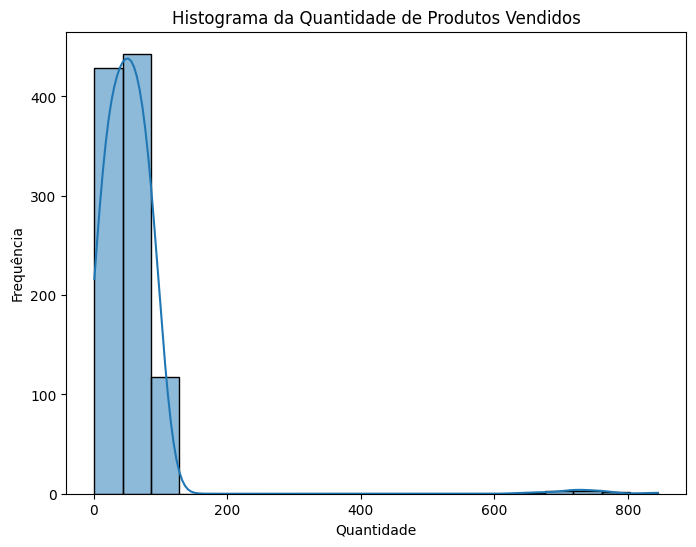

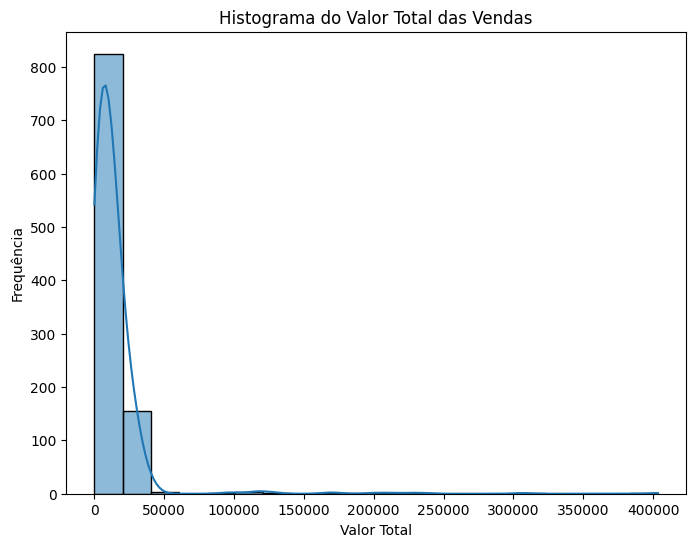

In [14]:
# Histograma para Quantidade
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Quantidade'], bins=20, kde=True)
plt.title('Histograma da Quantidade de Produtos Vendidos')
plt.xlabel('Quantidade')
plt.ylabel('Frequ√™ncia')
plt.show()

# Histograma para Valor_Total
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Valor_Total'], bins=20, kde=True)
plt.title('Histograma do Valor Total das Vendas')
plt.xlabel('Valor Total')
plt.ylabel('Frequ√™ncia')
plt.show()

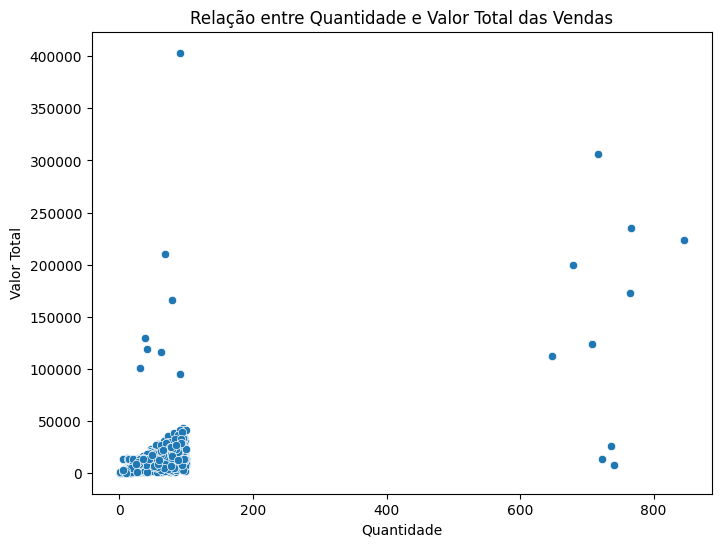

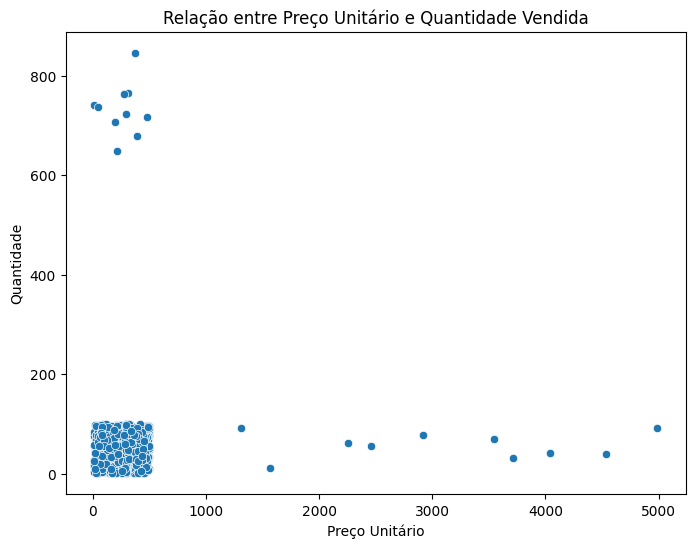

In [15]:
# Gr√°fico de dispers√£o: Quantidade vs Valor Total
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantidade', y='Valor_Total', data=dataset)
plt.title('Rela√ß√£o entre Quantidade e Valor Total das Vendas')
plt.xlabel('Quantidade')
plt.ylabel('Valor Total')
plt.show()

# Gr√°fico de dispers√£o: Preco_Unitario vs Quantidade
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Preco_Unitario', y='Quantidade', data=dataset)
plt.title('Rela√ß√£o entre Pre√ßo Unit√°rio e Quantidade Vendida')
plt.xlabel('Pre√ßo Unit√°rio')
plt.ylabel('Quantidade')
plt.show()

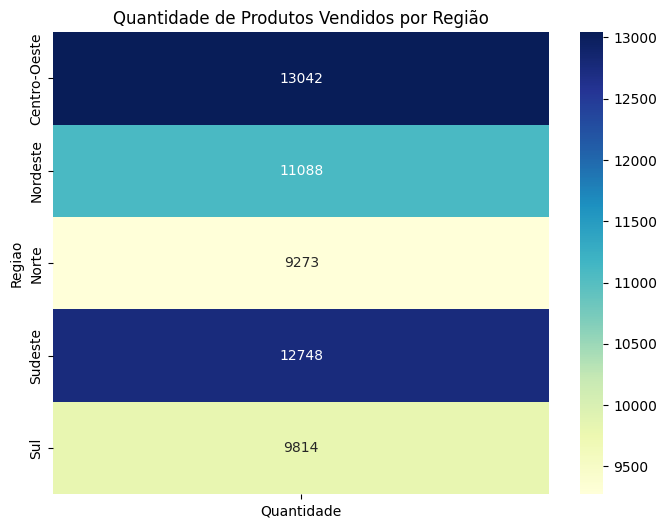

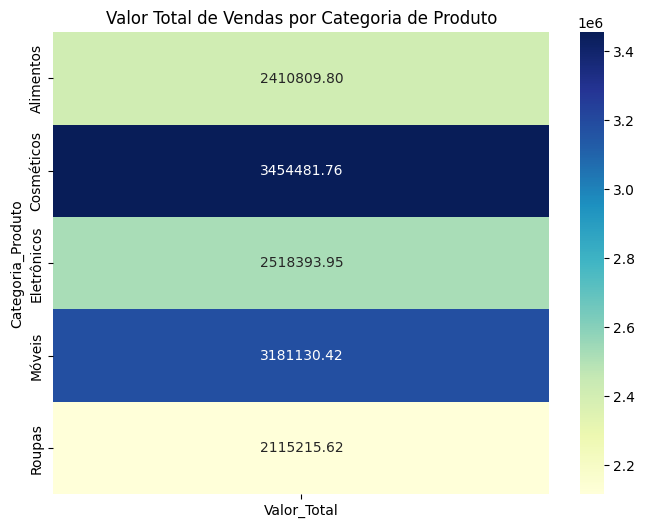

In [16]:
# Gr√°fico de calor da quantidade de produtos vendidos por regi√£o
quantidade_por_regiao = pd.pivot_table(dataset, values='Quantidade', index='Regiao', aggfunc='sum')
plt.figure(figsize=(8, 6))
sns.heatmap(quantidade_por_regiao, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Quantidade de Produtos Vendidos por Regi√£o')
plt.show()

# Gr√°fico de calor do valor total de vendas por categoria de produto
valor_total_por_categoria = pd.pivot_table(dataset, values='Valor_Total', index='Categoria_Produto', aggfunc='sum')
plt.figure(figsize=(8, 6))
sns.heatmap(valor_total_por_categoria, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Valor Total de Vendas por Categoria de Produto')
plt.show()

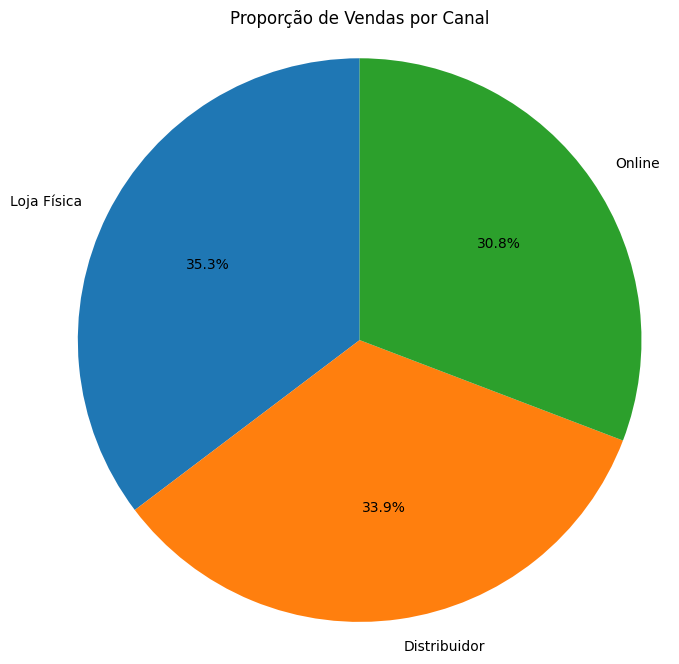

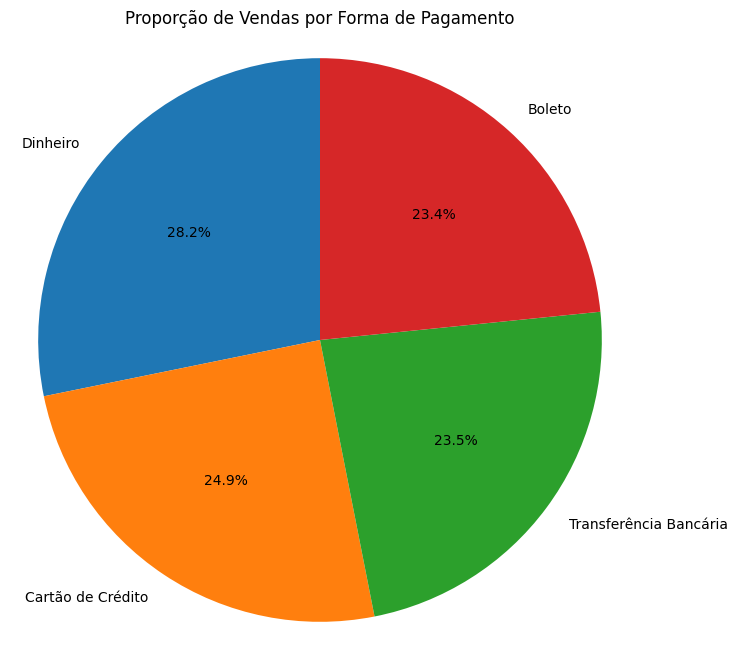

In [17]:
# Gr√°fico setorial para "Canal_Venda"
canal_venda_counts = dataset['Canal_Venda'].value_counts()
labels = canal_venda_counts.index
sizes = canal_venda_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Assegura que o gr√°fico seja um c√≠rculo
plt.title('Propor√ß√£o de Vendas por Canal')
plt.show()

# Gr√°fico setorial para "Forma_Pagamento"
forma_pagamento_counts = dataset['Forma_Pagamento'].value_counts()
labels = forma_pagamento_counts.index
sizes = forma_pagamento_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Assegura que o gr√°fico seja um c√≠rculo
plt.title('Propor√ß√£o de Vendas por Forma de Pagamento')
plt.show()

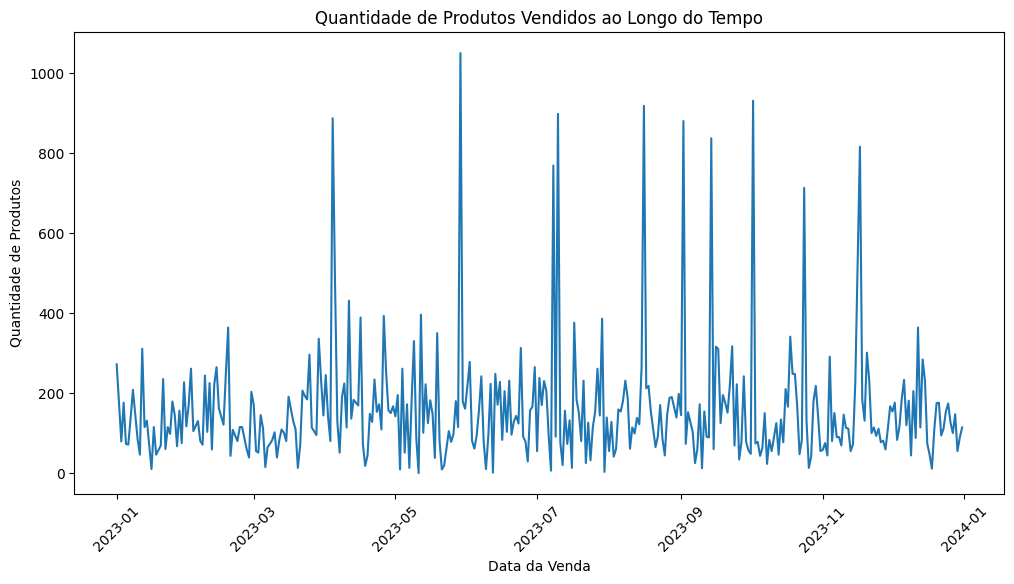

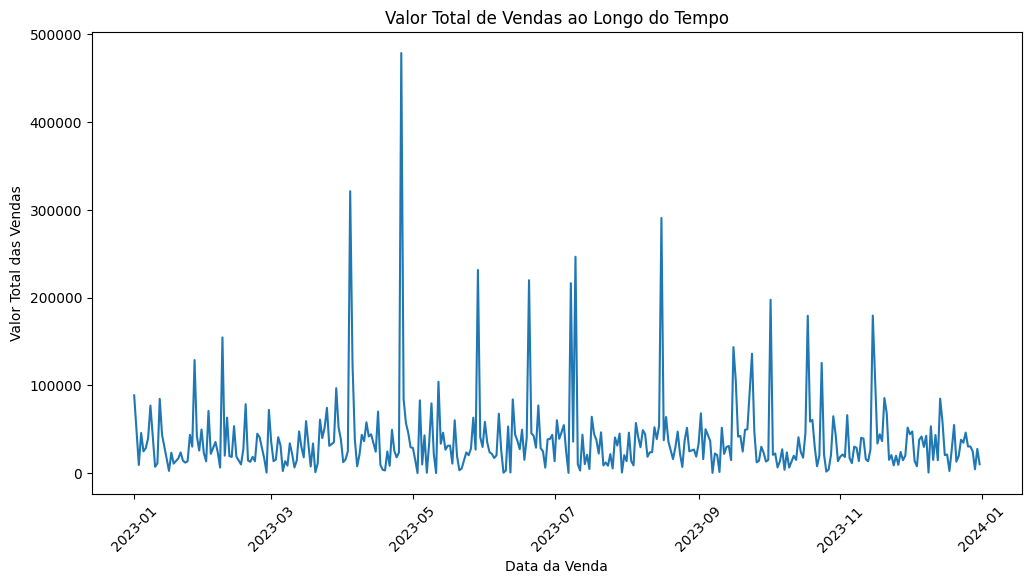

In [18]:
# Gr√°fico de linha: Quantidade de produtos vendidos ao longo do tempo (se a data estiver dispon√≠vel)
if 'Data_Venda' in dataset.columns:
  dataset['Data_Venda'] = pd.to_datetime(dataset['Data_Venda'])
  quantidade_por_data = dataset.groupby('Data_Venda')['Quantidade'].sum()
  plt.figure(figsize=(12, 6))
  plt.plot(quantidade_por_data.index, quantidade_por_data.values)
  plt.title('Quantidade de Produtos Vendidos ao Longo do Tempo')
  plt.xlabel('Data da Venda')
  plt.ylabel('Quantidade de Produtos')
  plt.xticks(rotation=45)
  plt.show()

# Gr√°fico de linha: Valor total de vendas ao longo do tempo (se a data estiver dispon√≠vel)
if 'Data_Venda' in dataset.columns:
  valor_total_por_data = dataset.groupby('Data_Venda')['Valor_Total'].sum()
  plt.figure(figsize=(12, 6))
  plt.plot(valor_total_por_data.index, valor_total_por_data.values)
  plt.title('Valor Total de Vendas ao Longo do Tempo')
  plt.xlabel('Data da Venda')
  plt.ylabel('Valor Total das Vendas')
  plt.xticks(rotation=45)
  plt.show()

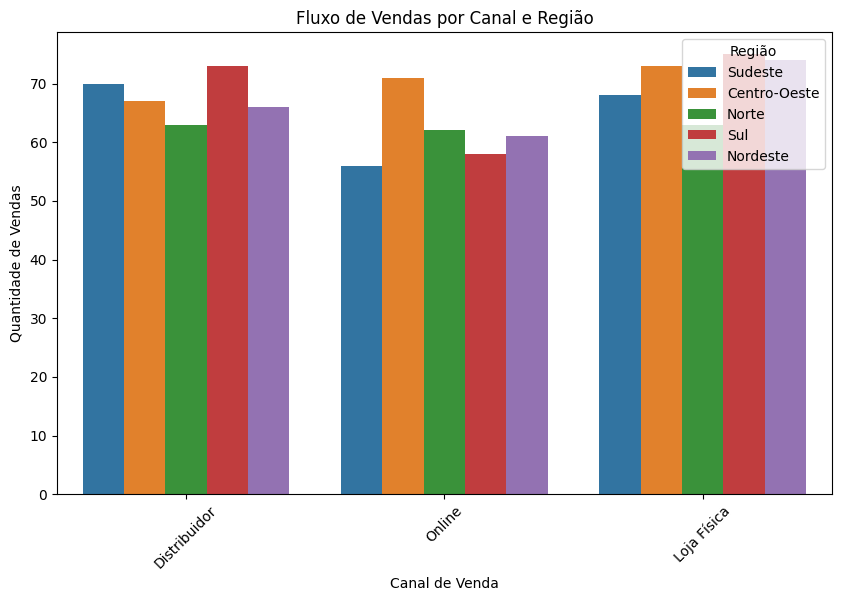

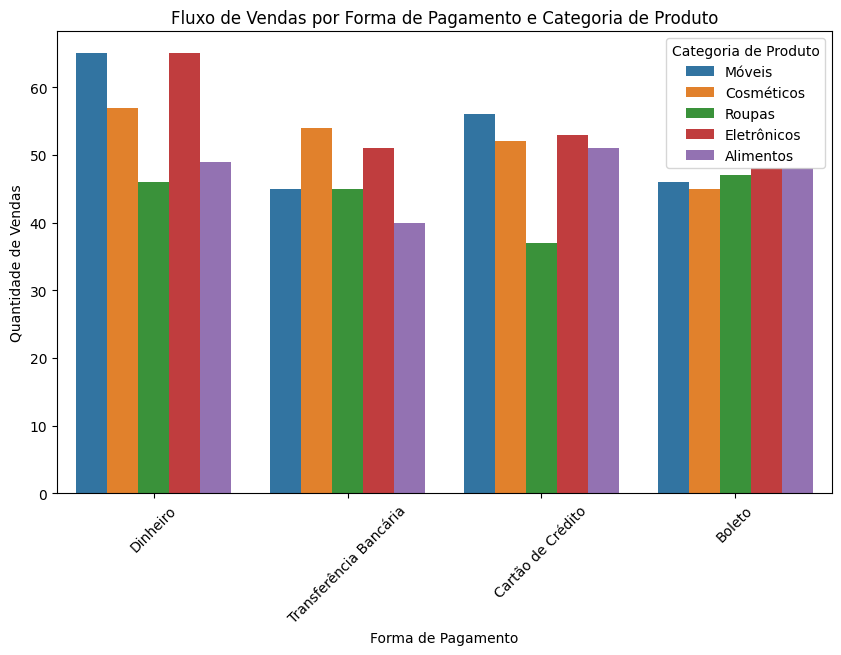

In [19]:
# Gr√°fico de barras para "Canal_Venda" e "Regiao"
plt.figure(figsize=(10, 6))
sns.countplot(x='Canal_Venda', hue='Regiao', data=dataset)
plt.title('Fluxo de Vendas por Canal e Regi√£o')
plt.xlabel('Canal de Venda')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.legend(title='Regi√£o')
plt.show()

# Gr√°fico de barras para "Forma_Pagamento" e "Categoria_Produto"
plt.figure(figsize=(10, 6))
sns.countplot(x='Forma_Pagamento', hue='Categoria_Produto', data=dataset)
plt.title('Fluxo de Vendas por Forma de Pagamento e Categoria de Produto')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.legend(title='Categoria de Produto')
plt.show()

#### Interpreta√ß√£o do Box Plot

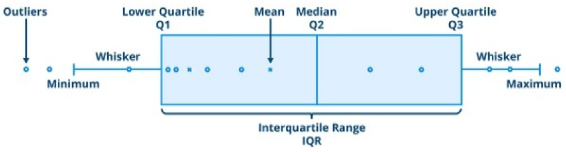

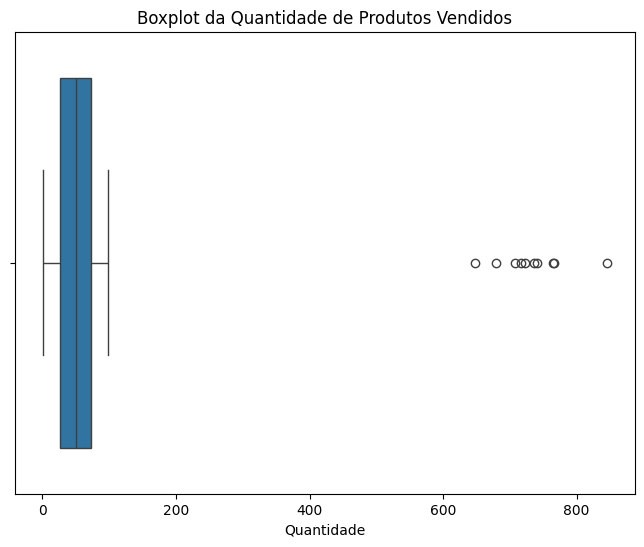

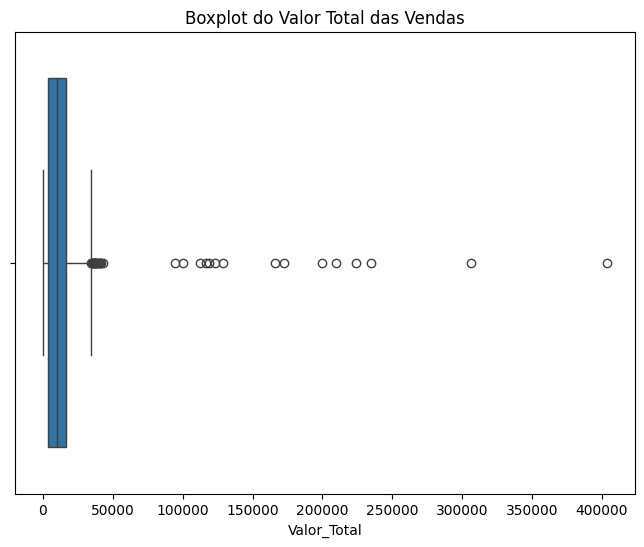

In [20]:
# Boxplot para 'Quantidade'
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Quantidade'])
plt.title('Boxplot da Quantidade de Produtos Vendidos')
plt.show()

# Boxplot para 'Valor_Total'
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Valor_Total'])
plt.title('Boxplot do Valor Total das Vendas')
plt.show()

## Etapa 6: Identifica√ß√£o dos Outliers

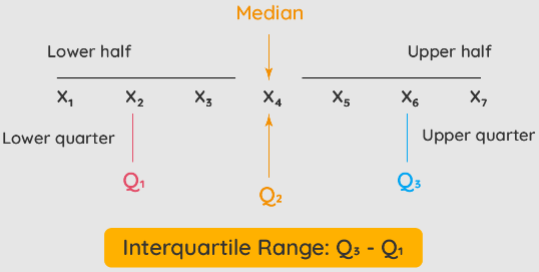

Para calcular o percentual de contamina√ß√£o de outliers em um dataset, se pode usar o m√©todo InterQuartile Range (IQR) que serve para identificar os valores at√≠picos em cada coluna num√©rica. O IQR define outliers como valores que est√£o:

Abaixo de Q1 - 1.5 x IQR

ou

Acima de Q3 + 1.5 x IQR

In [21]:
# Selecionar apenas colunas num√©ricas
numeric_cols = dataset.select_dtypes(include='number')

# Inicializar contador de outliers
outlier_counts = 0
total_values = numeric_cols.size

# Detectar outliers usando o m√©todo IQR para cada coluna num√©rica
for col in numeric_cols.columns:
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar outliers
    col_outliers = numeric_cols[(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)][col].count()
    outlier_counts += col_outliers
    print(f"Coluna '{col}' - Outliers: {col_outliers}")

# Calcular o percentual de contamina√ß√£o de outliers no dataset
outlier = (outlier_counts / total_values)
print("")
print(f"Percentual de contamina√ß√£o de outliers no dataset: {outlier*100:.2f}%")
print(f"Valor de contamina√ß√£o de outliers no dataset: {outlier:.4f}")

Coluna 'ID_Venda' - Outliers: 0
Coluna 'ID_Produto' - Outliers: 0
Coluna 'Quantidade' - Outliers: 10
Coluna 'Preco_Unitario' - Outliers: 10
Coluna 'ID_Cliente' - Outliers: 0
Coluna 'Valor_Total' - Outliers: 32
Coluna 'Desconto' - Outliers: 0
Coluna 'Frete' - Outliers: 0

Percentual de contamina√ß√£o de outliers no dataset: 0.65%
Valor de contamina√ß√£o de outliers no dataset: 0.0065


### Exibi√ß√£o do Boxplot


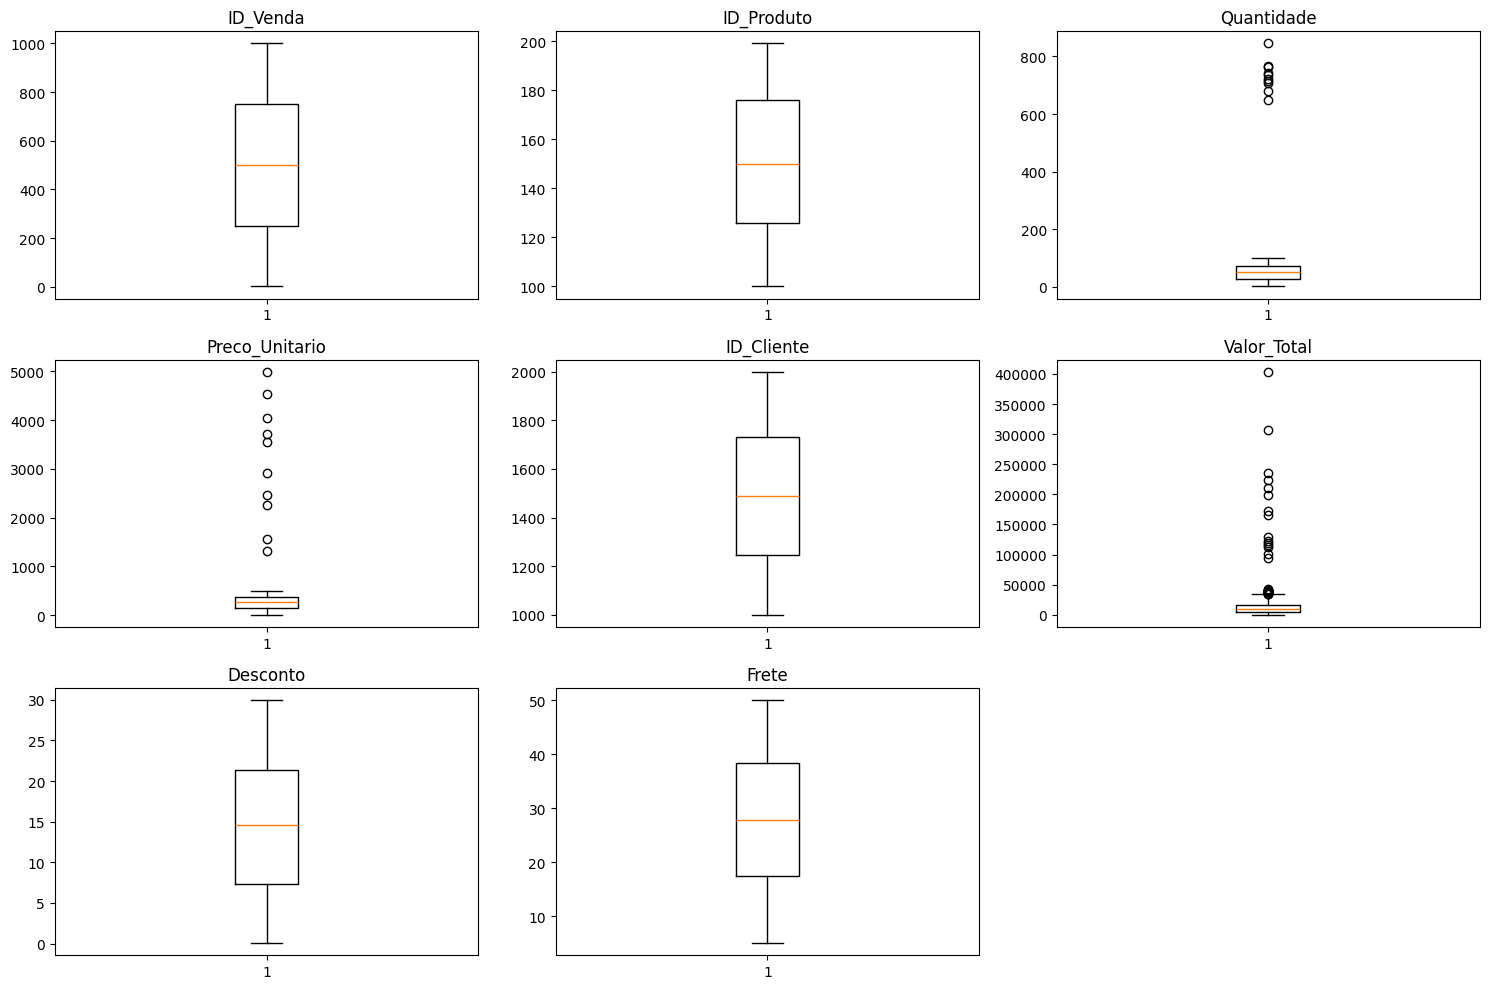

In [24]:
# Criar boxplot para cada coluna num√©rica para visualizar outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(dataset.select_dtypes(include='number').columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(dataset[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Visualiza√ß√£o da distribui√ß√£o dos dados outliers e inliers

Como o Isolation Forest Funciona

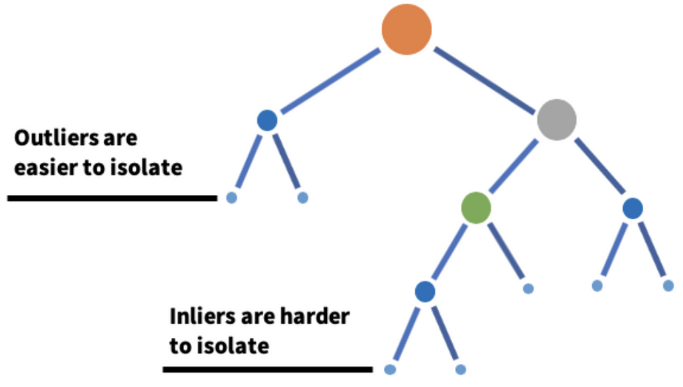

O Isolation Forest √© um algoritmo de detec√ß√£o de anomalias que funciona isolando observa√ß√µes "estranhas" ou "diferentes" dos dados normais. Em vez de modelar as caracter√≠sticas dos dados normais, o Isolation Forest identifica anomalias de maneira direta, isolando os pontos que est√£o "distantes" dos outros. √â baseado na ideia de que pontos de anomalia devem ser mais f√°ceis de isolar que os pontos normais.

Constru√ß√£o de √Årvores Aleat√≥rias:

O algoritmo come√ßa criando uma floresta de √°rvores de isolamento. Cada √°rvore √© constru√≠da de forma aleat√≥ria, e cada divis√£o (ou split) da √°rvore separa os dados em diferentes segmentos. A cada divis√£o, um recurso (feature) √© escolhido aleatoriamente, e o ponto de divis√£o dentro desse recurso tamb√©m √© escolhido de forma aleat√≥ria entre o valor m√≠nimo e m√°ximo da amostra. Isolamento das Observa√ß√µes:

O processo de divis√£o continua at√© que todas as observa√ß√µes estejam isoladas em n√≥s folhas ou at√© que a profundidade m√°xima da √°rvore seja atingida. Como as anomalias geralmente est√£o "distantes" do restante dos dados, elas tendem a ser isoladas rapidamente nas √°rvores. Em outras palavras, as anomalias precisam de menos divis√µes para serem isoladas.

C√°lculo do Score de Anomalia:

Cada ponto recebe um "score de anomalia" com base no n√∫mero m√©dio de divis√µes (profundidade m√©dia) necess√°rias para isol√°-lo. Quanto menos divis√µes forem necess√°rias para isolar um ponto, maior ser√° a probabilidade de ele ser uma anomalia. O score √© calculado em uma escala de 0 a 1. Valores pr√≥ximos de 1 indicam anomalias prov√°veis, enquanto valores pr√≥ximos de 0 indicam observa√ß√µes normais. Interpreta√ß√£o do Score:

Com base nos scores de anomalia, √© poss√≠vel definir um limiar. Observa√ß√µes com scores acima do limiar s√£o classificadas como anomalias, enquanto as demais s√£o consideradas normais.

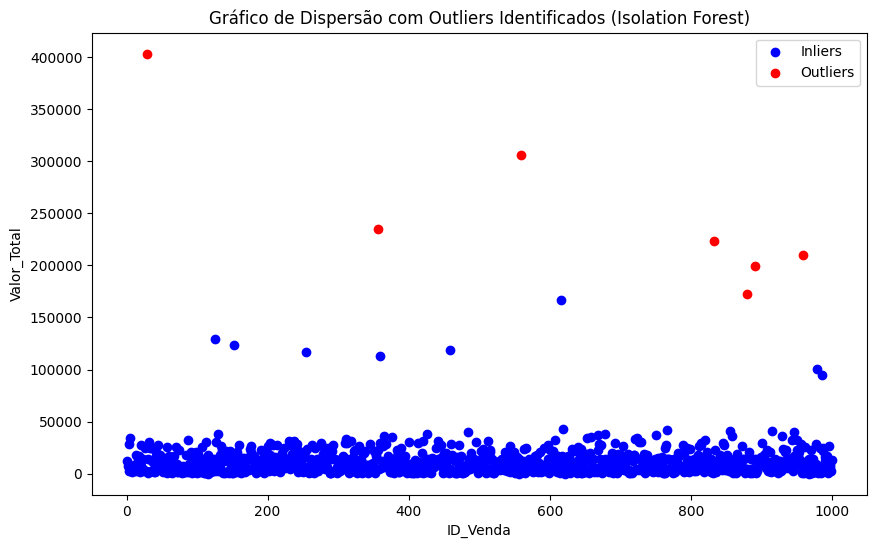

In [25]:
# Criar um modelo IsolationForest com o percentual de contamina√ß√£o definido
model = IsolationForest(contamination=outlier, random_state=42)

# Ajustar o modelo aos dados das colunas ID_Venda e Valor_Total
X = dataset[['ID_Venda', 'Valor_Total']]
model.fit(X)

# Prever se os dados s√£o outliers ou inliers
y_pred = model.predict(X)

# Criar um DataFrame com as previs√µes
dataset['Outlier'] = y_pred

# Plotar o gr√°fico de dispers√£o com os outliers e inliers
plt.figure(figsize=(10, 6))
plt.scatter(
    dataset.loc[dataset['Outlier'] == 1, 'ID_Venda'],
    dataset.loc[dataset['Outlier'] == 1, 'Valor_Total'],
    c='blue',
    label='Inliers',
)
plt.scatter(
    dataset.loc[dataset['Outlier'] == -1, 'ID_Venda'],
    dataset.loc[dataset['Outlier'] == -1, 'Valor_Total'],
    c='red',
    label='Outliers',
)
plt.xlabel('ID_Venda')
plt.ylabel('Valor_Total')
plt.title('Gr√°fico de Dispers√£o com Outliers Identificados (Isolation Forest)')
plt.legend()
plt.show()

Como o One-Class SVM funciona

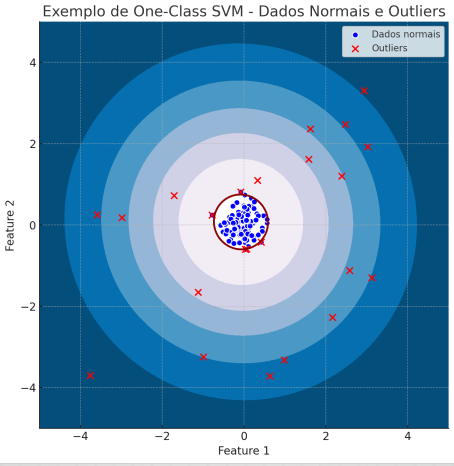

O One-Class SVM aprende os limites de um conjunto de dados normal e tenta identificar pontos que estejam fora desses limites. Em vez de classificar dados em duas ou mais classes, ele separa os dados normais do "espa√ßo vazio" onde os outliers provavelmente se encontram.

O algoritmo projeta os dados para um espa√ßo de alta dimensionalidade usando um kernel (como no SVM tradicional). Em seguida, encontra uma hiperplano ou fronteira que englobe a maioria dos dados normais, deixando os pontos fora dela como anomalias. O objetivo √© maximizar a margem ao redor dos dados normais enquanto minimiza os erros de inclus√£o, isto √©, dados normais erroneamente considerados outliers.

O modelo √© treinado apenas com dados da classe normal. Aprendendo sobre uma regi√£o compacta que abrange a maior parte dos dados. Assim, quando novos dados s√£o apresentados, o modelo verifica se eles est√£o dentro ou fora da regi√£o aprendida.

Os Hiperpar√¢metros importantes s√£o: ŒΩ (nu), que controla a fra√ß√£o m√°xima de outliers permitidos no conjunto de treinamento e afeta a complexidade do modelo; Kernel, que define a fun√ß√£o usada para projetar os dados para o espa√ßo de alta dimensionalidade, podendo ser linear ou RBF (Radial Basis Function, para dados n√£o lineares).

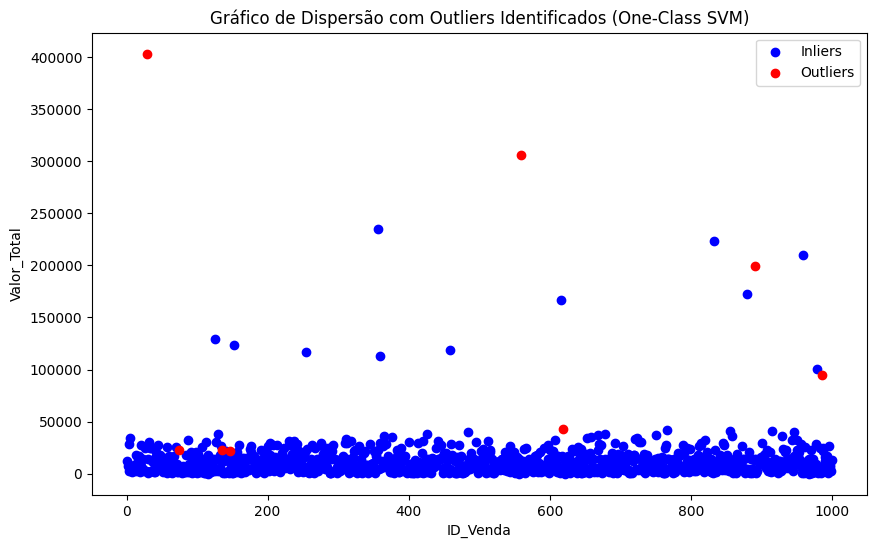

In [26]:
# Criar um modelo One-Class SVM com o percentual de contamina√ß√£o definido
model = OneClassSVM(nu=outlier, kernel='rbf', gamma='scale')

# Ajustar o modelo aos dados das colunas ID_Venda e Valor_Total
X = dataset[['ID_Venda', 'Valor_Total']]
model.fit(X)

# Prever se os dados s√£o outliers ou inliers
y_pred = model.predict(X)

# Criar um DataFrame com as previs√µes
dataset['Outlier'] = y_pred

# Plotar o gr√°fico de dispers√£o com os outliers e inliers
plt.figure(figsize=(10, 6))
plt.scatter(
    dataset.loc[dataset['Outlier'] == 1, 'ID_Venda'],
    dataset.loc[dataset['Outlier'] == 1, 'Valor_Total'],
    c='blue',
    label='Inliers',
)
plt.scatter(
    dataset.loc[dataset['Outlier'] == -1, 'ID_Venda'],
    dataset.loc[dataset['Outlier'] == -1, 'Valor_Total'],
    c='red',
    label='Outliers',
)
plt.xlabel('ID_Venda')
plt.ylabel('Valor_Total')
plt.title('Gr√°fico de Dispers√£o com Outliers Identificados (One-Class SVM)')
plt.legend()
plt.show()

Como funciona o Estimador de Covari√¢ncia

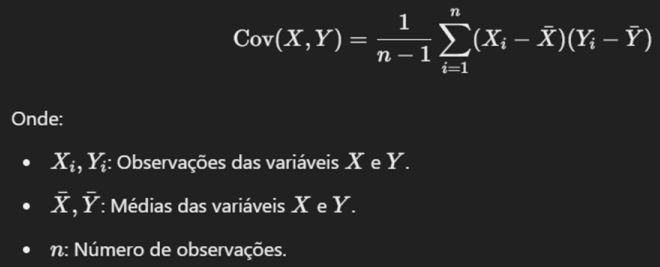

O estimador de covari√¢ncia √© uma ferramenta estat√≠stica utilizada para calcular e entender as rela√ß√µes entre vari√°veis em um conjunto de dados. Ele mede como duas ou mais vari√°veis variam juntas (ou seja, se aumentam ou diminuem ao mesmo tempo). √â essencial em muitas √°reas, incluindo aprendizado de m√°quina, finan√ßas e an√°lise de dados, especialmente na modelagem de distribui√ß√µes multivariadas.

A covari√¢ncia indica o grau de relacionamento linear entre duas vari√°veis:

‚Ä¢	Se positiva, as vari√°veis tendem a aumentar juntas.

‚Ä¢	Se negativa, quando uma aumenta, a outra tende a diminuir.

‚Ä¢	Se pr√≥xima de zero, n√£o h√° rela√ß√£o linear significativa.

Estimadores comuns de covari√¢ncia:

1. Estimador m√°ximo de verossimilhan√ßa (MLE): usado com dados que seguem uma distribui√ß√£o normal e sens√≠vel a outliers.

2. Estimadores robustos: ajustam-se melhor em presen√ßa de outliers ou dados n√£o normalmente distribu√≠dos. Exemplos: Minimum Covariance Determinant (MCD), encontra a menor elipse que engloba a maior parte dos dados; Shrinkage, Combina o estimador tradicional com uma matriz fixa (como identidade), reduzindo a influ√™ncia de pequenos conjuntos de dados; Estimadores baseados em penaliza√ß√£o, s√£o usados em alta dimensionalidade, onde o n√∫mero de vari√°veis √© maior que o n√∫mero de observa√ß√µes.

Aplica√ß√µes do estimador de covari√¢ncia: Redu√ß√£o de dimensionalidade, usado em t√©cnicas como PCA (An√°lise de Componentes Principais); An√°lise de portf√≥lios financeiros, determina como ativos financeiros se correlacionam para criar diversifica√ß√£o; Detec√ß√£o de outliers, modelos como o Elliptic Envelope utilizam a matriz de covari√¢ncia para identificar anomalias; e, Modelagem probabil√≠stica, essencial para definir distribui√ß√µes como a multivariada normal.

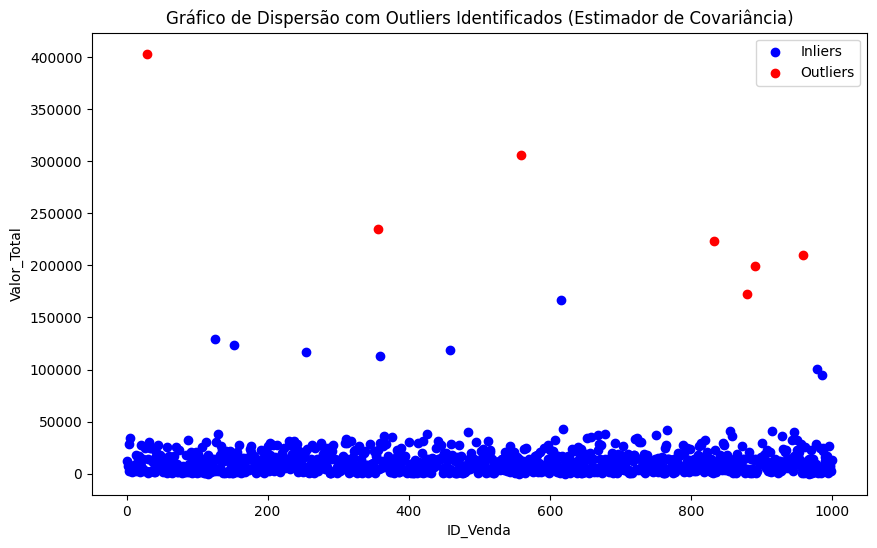

In [27]:
# Criar um modelo EllipticEnvelope com o percentual de contamina√ß√£o definido
model = EllipticEnvelope(contamination=outlier)

# Ajustar o modelo aos dados das colunas ID_Venda e Valor_Total
X = dataset[['ID_Venda', 'Valor_Total']]
model.fit(X)

# Prever se os dados s√£o outliers ou inliers
y_pred = model.predict(X)

# Criar um DataFrame com as previs√µes
dataset['Outlier'] = y_pred

# Plotar o gr√°fico de dispers√£o com os outliers e inliers
plt.figure(figsize=(10, 6))
plt.scatter(
    dataset.loc[dataset['Outlier'] == 1, 'ID_Venda'],
    dataset.loc[dataset['Outlier'] == 1, 'Valor_Total'],
    c='blue',
    label='Inliers',
)
plt.scatter(
    dataset.loc[dataset['Outlier'] == -1, 'ID_Venda'],
    dataset.loc[dataset['Outlier'] == -1, 'Valor_Total'],
    c='red',
    label='Outliers',
)
plt.xlabel('ID_Venda')
plt.ylabel('Valor_Total')
plt.title('Gr√°fico de Dispers√£o com Outliers Identificados (Estimador de Covari√¢ncia)')
plt.legend()
plt.show()

### Separa√ß√£o dos Outliers dos Inliers

In [28]:
# Selecionar apenas colunas num√©ricas para a detec√ß√£o de outliers
numeric_data = dataset.select_dtypes(include='number')

# Configurar e aplicar o Isolation Forest com contamina√ß√£o
iso_forest = IsolationForest(contamination=outlier, random_state=42)
outlier_labels = iso_forest.fit_predict(numeric_data)

# Adicionar os r√≥tulos de outliers ao dataset
dataset['is_outlier'] = outlier_labels

# Filtrar apenas os outliers (r√≥tulo -1)
outliers = dataset[dataset['is_outlier'] == -1]

# Exibir os dados que s√£o outliers
print("Dados identificados como outliers:")
print(outliers.to_string())

# Exibir a quantidade de outliers detectados
outlier_count = len(outliers)
print(f"\nTotal de outliers: {outlier_count}")

Dados identificados como outliers:
     ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto  Outlier  is_outlier
28         29 2023-04-26         108        91.0         4989.41        1204    403467.56   Loja F√≠sica                Dinheiro     11.14  10.89  Centro-Oeste            M√≥veis       -1          -1
356       357 2023-08-16         180       766.0          307.57        1211    234712.67  Distribuidor       Cart√£o de Cr√©dito      0.38   9.32       Sudeste        Cosm√©ticos       -1          -1
558       559 2023-04-04         177       716.0          477.17        1088    306474.28  Distribuidor       Cart√£o de Cr√©dito     10.31  45.06       Sudeste        Cosm√©ticos       -1          -1
832       833 2023-07-10         113       845.0          373.53        1448    223698.16   Loja F√≠sica                Dinheiro     29.13   9.16       Sudeste      

In [29]:
# Remover os outliers
try:
    dataset = dataset[dataset['is_outlier'] == 1].drop(columns=['is_outlier'])
except Exception as e:
    print(f"Ocorreu um erro: {e}")

In [30]:
# Remover a coluna 'Outlier' do dataset
if 'Outlier' in dataset.columns:
  dataset = dataset.drop('Outlier', axis=1)

# Remover a coluna 'is_outlier' do dataset
if 'is_outlier' in dataset.columns:
  dataset = dataset.drop('is_outlier', axis=1)

In [31]:
# Exibir o dataset sem os outliers
print("Dataset sem os outliers:")
print(dataset.head().to_string())

# Exibir informa√ß√µes gerais do dataset
print("\nInforma√ß√µes Gerais do Dataset:")
print(dataset.info())

Dataset sem os outliers:
   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos
3         4 2023-07-12         193        21.0          189.50        1576      3012.53   Loja F√≠sica                Dinheiro     25.10  31.88       Sudeste            Roupas
4         5 2023-11-20         111        92.0          463.81        1161     34424.12    

## Etapa 7: Preprocessamento de Dados (Parametriza√ß√£o, Codifica√ß√£o e Normaliza√ß√£o)

### Rules

In [32]:
# Definir a primeira coluna como meta, a √∫ltima como target e as demais como features
meta = dataset.columns[0]
target = dataset.columns[-1]
features = dataset.columns[1:-1]

print(f"Meta: {meta}")
print(f"Target: {target}")
print(f"Features: {features}")

Meta: ID_Venda
Target: Categoria_Produto
Features: Index(['Data_Venda', 'ID_Produto', 'Quantidade', 'Preco_Unitario',
       'ID_Cliente', 'Valor_Total', 'Canal_Venda', 'Forma_Pagamento',
       'Desconto', 'Frete', 'Regiao'],
      dtype='object')


### Encoding

In [ ]:
# T√©cnicas de Encoding
# Label Encoding: Simples e direto, √∫til para vari√°veis ordinais.
# One-Hot Encoding: Ideal para vari√°veis nominais com poucas categorias.
# Binary Encoding: Reduz o n√∫mero de colunas para vari√°veis com muitas categorias.
# Target Encoding: √ötil para problemas supervisionados, especialmente com muitas categorias.
# Frequency Encoding: Captura a frequ√™ncia das categorias.
# Ordinal Encoding: Para vari√°veis categ√≥ricas com ordem.
# Hash Encoding: √ötil para um n√∫mero muito grande de categorias, por√©m pode introduzir colis√µes.

In [33]:
# Label Encoding
datasetx = dataset.copy()
print(datasetx.head().to_string())

# Criar um objeto LabelEncoder
le = LabelEncoder()

# Iterar pelas colunas categ√≥ricas do datasetx
for column in datasetx.select_dtypes(include=['object']):
  # Aplicar Label Encoding na coluna atual
  datasetx[column] = le.fit_transform(datasetx[column])

# Exibir o datasetx com as colunas categ√≥ricas transformadas em num√©ricas
print("Datasetx com colunas categ√≥ricas transformadas em num√©ricas (Label Encoding):")
print(datasetx.head().to_string())

   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos
3         4 2023-07-12         193        21.0          189.50        1576      3012.53   Loja F√≠sica                Dinheiro     25.10  31.88       Sudeste            Roupas
4         5 2023-11-20         111        92.0          463.81        1161     34424.12        Online               

In [34]:
# One-Hot Encoding
datasetx = dataset.copy()
print(datasetx.head().to_string())

# Iterar pelas colunas categ√≥ricas do datasetx
for column in datasetx.select_dtypes(include=['object']):
  # Aplicar One-Hot Encoding na coluna atual
  datasetx = pd.get_dummies(datasetx, columns=[column], prefix=[column])

# Exibir o cabe√ßalho do datasetx com as colunas categ√≥ricas transformadas em num√©ricas
print("Datasetx com colunas categ√≥ricas transformadas em num√©ricas (One-Hot Encoding):")
print(datasetx.head().to_string())

   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos
3         4 2023-07-12         193        21.0          189.50        1576      3012.53   Loja F√≠sica                Dinheiro     25.10  31.88       Sudeste            Roupas
4         5 2023-11-20         111        92.0          463.81        1161     34424.12        Online               

In [35]:
# Binary Encoding
datasetx = dataset.copy()
print(datasetx.head().to_string())

# Iterar pelas colunas categ√≥ricas do datasetx
for column in datasetx.select_dtypes(include=['object']):
  # Criar um dicion√°rio para mapear categorias para valores bin√°rios
  unique_categories = datasetx[column].unique()
  category_mapping = {category: bin(i)[2:].zfill(len(bin(len(unique_categories) - 1)[2:])) for i, category in enumerate(unique_categories)}

  # Aplicar Binary Encoding na coluna atual
  datasetx[column] = datasetx[column].map(category_mapping)

  # Separar as colunas bin√°rias criadas
  for bit_index in range(len(bin(len(unique_categories) - 1)[2:])):
    new_column_name = f"{column}_bit_{bit_index + 1}"
    datasetx[new_column_name] = datasetx[column].str[bit_index].astype(int)

  # Remover a coluna original com a representa√ß√£o bin√°ria
  datasetx = datasetx.drop(columns=[column])

# Exibir o cabe√ßalho do datasetx com as colunas categ√≥ricas transformadas em num√©ricas
print("Datasetx com colunas categ√≥ricas transformadas em num√©ricas (Binary Encoding):")
print(datasetx.head().to_string())

   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos
3         4 2023-07-12         193        21.0          189.50        1576      3012.53   Loja F√≠sica                Dinheiro     25.10  31.88       Sudeste            Roupas
4         5 2023-11-20         111        92.0          463.81        1161     34424.12        Online               

In [36]:
# Frequency Encoding
datasetx = dataset.copy()
print(datasetx.head().to_string())

# Iterar pelas colunas categ√≥ricas do datasetx
for column in datasetx.select_dtypes(include=['object']):
  # Calcular a frequ√™ncia de cada categoria na coluna atual
  frequency_encoding = datasetx.groupby(column)[column].transform('count') / len(datasetx)

  # Substituir as categorias pelos valores codificados (frequ√™ncia)
  datasetx[column] = frequency_encoding

# Exibir o cabe√ßalho do datasetx com as colunas categ√≥ricas transformadas em num√©ricas
print("Datasetx com colunas categ√≥ricas transformadas em num√©ricas (Frequency Encoding):")
print(datasetx.head().to_string())

   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos
3         4 2023-07-12         193        21.0          189.50        1576      3012.53   Loja F√≠sica                Dinheiro     25.10  31.88       Sudeste            Roupas
4         5 2023-11-20         111        92.0          463.81        1161     34424.12        Online               

In [37]:
# Hash Encoding
datasetx = dataset.copy()
print(datasetx.head().to_string())

# Iterar pelas colunas categ√≥ricas do datasetx
for column in datasetx.select_dtypes(include=['object']):
  # Aplicar Hash Encoding na coluna atual
  datasetx[column] = datasetx[column].apply(hash)

# Exibir o cabe√ßalho do datasetx com as colunas categ√≥ricas transformadas em num√©ricas
print("Datasetx com colunas categ√≥ricas transformadas em num√©ricas (Hash Encoding):")
print(datasetx.head().to_string())

   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos
3         4 2023-07-12         193        21.0          189.50        1576      3012.53   Loja F√≠sica                Dinheiro     25.10  31.88       Sudeste            Roupas
4         5 2023-11-20         111        92.0          463.81        1161     34424.12        Online               

In [38]:
# Ordinal Encoding
datasetx = dataset.copy()
print(datasetx.head().to_string())

# Iterar pelas colunas categ√≥ricas do datasetx
for column in datasetx.select_dtypes(include=['object']):
  # Criar um dicion√°rio para mapear categorias para valores ordinais
  unique_categories = datasetx[column].unique()
  category_mapping = {category: i for i, category in enumerate(unique_categories)}

  # Aplicar Ordinal Encoding na coluna atual
  datasetx[column] = datasetx[column].map(category_mapping)

# Exibir o cabe√ßalho do datasetx com as colunas categ√≥ricas transformadas em num√©ricas
print("Datasetx com colunas categ√≥ricas transformadas em num√©ricas (Ordinal Encoding):")
print(datasetx.head().to_string())

   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos
3         4 2023-07-12         193        21.0          189.50        1576      3012.53   Loja F√≠sica                Dinheiro     25.10  31.88       Sudeste            Roupas
4         5 2023-11-20         111        92.0          463.81        1161     34424.12        Online               

In [39]:
# Label encoding
for column in dataset.select_dtypes(include=['object']):
  # Criar um objeto LabelEncoder
  le = LabelEncoder()

  # Aplicar Label Encoding na coluna original
  dataset[column + '_encoded'] = le.fit_transform(dataset[column])

# Exibir o dataset com os novos campos criados com base no label encoding
print("Dataset com novos campos com Label Encoding:")
print(dataset.head().to_string())

Dataset com novos campos com Label Encoding:
   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto  Canal_Venda_encoded  Forma_Pagamento_encoded  Regiao_encoded  Categoria_Produto_encoded
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis                    0                        2               3                          3
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos                    2                        3               0                          1
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste

### Normalizing

In [ ]:
# T√©cnicas de normaliza√ß√£o
# Z-Score Normalization: Centraliza dados em torno da m√©dia 0 e desvio padr√£o 1.
# Max Abs Scaling: Escala pelo valor absoluto m√°ximo, √∫til para dados com m√©dia pr√≥xima de 0.
# L1/L2 Normalization: Usa normas para normalizar os dados em rela√ß√£o √† soma absoluta ou quadr√°tica.
# Robust Scaling: Usa a mediana e IQR, ideal para dados com outliers.
# Log Transformation: Reduz a escala de valores grandes e ajusta distribui√ß√µes distorcidas.
# Power Transformations: Ajusta distribui√ß√µes para se aproximarem de uma normal.
# Min-Max Scaling: Escala os dados entre um intervalo espec√≠fico (0-1, geralmente).

In [40]:
# Power Transformations
datasetx = dataset.copy()
print(datasetx.head().to_string())

# Selecionar apenas colunas num√©ricas para a normaliza√ß√£o
numeric_cols = datasetx.select_dtypes(include=['number']).columns

# Criar um objeto PowerTransformer
pt = PowerTransformer()

# Aplicar Power Transformations √†s colunas num√©ricas
datasetx[numeric_cols] = pt.fit_transform(datasetx[numeric_cols])

# Exibir o dataset normalizado
print("Dataset normalizado com Power Transformations:")
print(datasetx.head().to_string())

   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto  Canal_Venda_encoded  Forma_Pagamento_encoded  Regiao_encoded  Categoria_Produto_encoded
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis                    0                        2               3                          3
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos                    2                        3               0                          1
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos                    1     

In [41]:
# Log Transformation
datasetx = dataset.copy()
print(datasetx.head().to_string())

# Iterar pelas colunas num√©ricas do datasetn
for column in datasetx.select_dtypes(include=['number']):
  # Aplicar Log Transformation na coluna atual, tratando poss√≠veis valores negativos
  datasetx[column] = np.log1p(datasetx[column])

# Exibir o datasetn com as colunas num√©ricas normalizadas
print("Dataset com colunas num√©ricas normalizadas (Log Transformation):")
print(datasetx.head().to_string())

   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto  Canal_Venda_encoded  Forma_Pagamento_encoded  Regiao_encoded  Categoria_Produto_encoded
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis                    0                        2               3                          3
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos                    2                        3               0                          1
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos                    1     

In [42]:
# Robust Scaling
datasetx = dataset.copy()
print(datasetx.head().to_string())

# Selecionar as colunas num√©ricas para normaliza√ß√£o
numerical_cols = datasetx.select_dtypes(include=np.number).columns

# Criar um objeto RobustScaler
scaler = RobustScaler()

# Aplicar Robust Scaling √†s colunas num√©ricas
datasetx[numerical_cols] = scaler.fit_transform(datasetx[numerical_cols])

# Exibir o datasetn com as features normalizadas
print("Datasetn com features normalizadas (Robust Scaling):")
print(datasetx.head().to_string())

   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto  Canal_Venda_encoded  Forma_Pagamento_encoded  Regiao_encoded  Categoria_Produto_encoded
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis                    0                        2               3                          3
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos                    2                        3               0                          1
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos                    1     

In [43]:
# L1 Normalization
datasetx = dataset.copy()
print(datasetx.head().to_string())

# L1 Normalization
for column in datasetx.select_dtypes(include=['number']):
    datasetx[column] = datasetx[column] / np.linalg.norm(datasetx[column], ord=1)

print("Dataset com features normalizadas (L1):")
print(datasetx.head().to_string())

   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto  Canal_Venda_encoded  Forma_Pagamento_encoded  Regiao_encoded  Categoria_Produto_encoded
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis                    0                        2               3                          3
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos                    2                        3               0                          1
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos                    1     

In [44]:
# Max Abs Scaling
datasetx = dataset.copy()
print(datasetx.head().to_string())

# Normalizar as features usando Max Abs Scaling
for column in datasetx.columns:
  if pd.api.types.is_numeric_dtype(datasetx[column]):
    # Aplicar Max Abs Scaling √† coluna atual
    datasetx[column] = datasetx[column] / datasetx[column].abs().max()

# Exibir o dataset normalizado
print("Dataset normalizado com Max Abs Scaling:")
print(datasetx.head().to_string())

   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto  Canal_Venda_encoded  Forma_Pagamento_encoded  Regiao_encoded  Categoria_Produto_encoded
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis                    0                        2               3                          3
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos                    2                        3               0                          1
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos                    1     

In [45]:
# Z-Score Normalization
datasetx = dataset.copy()
print(datasetx.head().to_string())

# Criar um objeto StandardScaler
scaler = StandardScaler()

# Iterar pelas colunas num√©ricas do datasetx
for column in datasetx.select_dtypes(include=['number']):
  # Aplicar Z-Score Normalization na coluna atual
  datasetx[column] = scaler.fit_transform(datasetx[[column]])

# Exibir o datasetx com as colunas num√©ricas normalizadas
print("Dataset com colunas num√©ricas normalizadas (Z-Score Normalization):")
print(datasetx.head().to_string())

   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto  Canal_Venda_encoded  Forma_Pagamento_encoded  Regiao_encoded  Categoria_Produto_encoded
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis                    0                        2               3                          3
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos                    2                        3               0                          1
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos                    1     

In [46]:
# MinMaxScaler
datasetx = dataset.copy()
print(datasetx.head().to_string())

# Criar um objeto MinMaxScaler
scaler = MinMaxScaler()

# Iterar pelas colunas num√©ricas do datasetx
datasetx[numerical_cols] = scaler.fit_transform(datasetx[numerical_cols])

# Exibir o datasetx normalizado
print("Datasetn com colunas num√©ricas normalizadas (MinMaxScaler):")
print(datasetx.head().to_string())

   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto  Canal_Venda_encoded  Forma_Pagamento_encoded  Regiao_encoded  Categoria_Produto_encoded
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis                    0                        2               3                          3
1         2 2023-02-17         186        44.0          184.88        1545      7735.18        Online  Transfer√™ncia Banc√°ria      5.12  16.96  Centro-Oeste        Cosm√©ticos                    2                        3               0                          1
2         3 2023-04-28         157        68.0          467.58        1468     28034.97   Loja F√≠sica       Cart√£o de Cr√©dito     11.96  42.26  Centro-Oeste        Cosm√©ticos                    1     

In [47]:
# MinMaxScaler
scaler = MinMaxScaler()

# Iterar pelas colunas num√©ricas do datasetx
for column in dataset.select_dtypes(include=['number']):
  # Aplicar MinMaxScaler na coluna atual e criar um novo campo com o sufixo "_minmax"
  dataset[column + '_minmax'] = scaler.fit_transform(dataset[[column]])

# Exibir o datasetx com os novos campos normalizados
print("Dataset com novos campos normalizados com MinMaxScaler:")
print(dataset.head().to_string())

Dataset com novos campos normalizados com MinMaxScaler:
   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto  Canal_Venda_encoded  Forma_Pagamento_encoded  Regiao_encoded  Categoria_Produto_encoded  ID_Venda_minmax  ID_Produto_minmax  Quantidade_minmax  Preco_Unitario_minmax  ID_Cliente_minmax  Valor_Total_minmax  Desconto_minmax  Frete_minmax  Canal_Venda_encoded_minmax  Forma_Pagamento_encoded_minmax  Regiao_encoded_minmax  Categoria_Produto_encoded_minmax
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis                    0                        2               3                          3         0.000000           0.686869           0.074324               0.062115           0.281281            0.070159         0.941137      0.168037   

## Etapa 8: Redu√ß√£o da Dimensionalidade

Como o PCA funciona

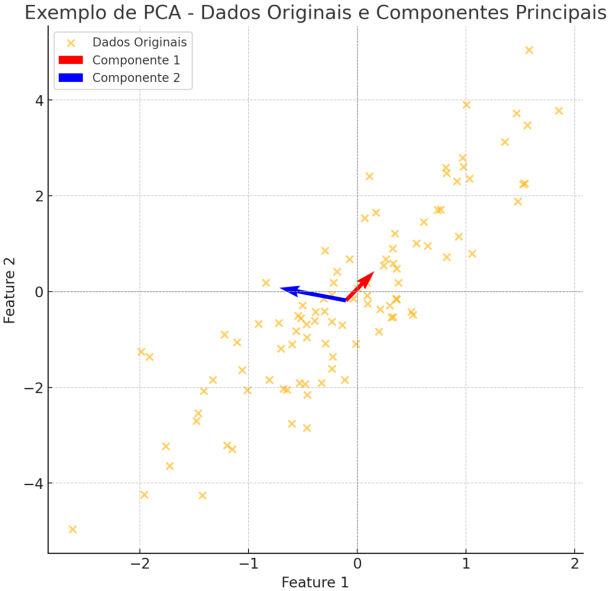

O PCA come√ßa garantindo que todas as vari√°veis tenham a mesma escala. Normaliza os dados para que cada vari√°vel tenha m√©dia 0 e desvio padr√£o 1. O PCA mede como as vari√°veis se relacionam entre si. Para isso, calcula a matriz de covari√¢ncia ou, em alguns casos, a matriz de correla√ß√£o. A matriz de covari√¢ncia captura a variabilidade conjunta entre as vari√°veis.

C√°lculo dos autovalores e autovetores: Os autovalores (ùúÜ) representam a vari√¢ncia explicada por cada componente principal. Os autovetores (ùë£) indicam a dire√ß√£o dos componentes principais no espa√ßo de dados. Resolvem a equa√ß√£o caracter√≠stica: (ùê∂‚àíùúÜùêº)ùë£=0. Onde C √© a matriz de covari√¢ncia, Œª √© o autovalor, I √© a matriz identidade e v o autovetor.

Escolha dos componentes principais: Os autovalores s√£o ordenados em ordem decrescente. Os primeiros componentes principais (com maiores autovalores) s√£o selecionados para representar os dados.

Transforma√ß√£o dos dados: Os dados originais s√£o projetados nos novos eixos definidos pelos autovetores escolhidos. Isso reduz a dimensionalidade, preservando o m√°ximo de vari√¢ncia.

In [48]:
# Verificar se as colunas 'pc1' e 'pc2' j√° existem no dataset
if 'pc1' not in dataset.columns or 'pc2' not in dataset.columns:
  # Selecionar apenas as colunas com sufixo '_minmax'
  minmax_columns = [col for col in dataset.columns if col.endswith('_minmax')]
  dataset_minmax = dataset[minmax_columns]

  # Substituir valores NaN por 0
  dataset_minmax = dataset_minmax.fillna(0)

  # Aplicar PCA com 2 componentes principais
  pca = PCA(n_components=2)
  principal_components = pca.fit_transform(dataset_minmax)

  # Criar as colunas 'pc1' e 'pc2' no dataset original com os componentes principais
  dataset['pc1'] = principal_components[:, 0]
  dataset['pc2'] = principal_components[:, 1]
else:
  # Se as colunas 'pc1' e 'pc2' j√° existem, atualizar os valores com os novos componentes principais
  minmax_columns = [col for col in dataset.columns if col.endswith('_minmax')]
  dataset_minmax = dataset[minmax_columns]

  # Substituir valores NaN por 0
  dataset_minmax = dataset_minmax.fillna(0)

  # Aplicar PCA com 2 componentes principais
  pca = PCA(n_components=2)
  principal_components = pca.fit_transform(dataset_minmax)

  # Atualizar os valores das colunas 'pc1' e 'pc2'
  dataset['pc1'] = principal_components[:, 0]
  dataset['pc2'] = principal_components[:, 1]

## Etapa 9: Clusteriza√ß√£o

### T√©cnicas para identifica√ß√£o do hiperparametro K

Como funciona a t√©cnica do silhueta

Para cada ponto i no conjunto de dados:

C√°lculo da Coes√£o (a(i)):

a(i) √© a dist√¢ncia m√©dia entre o ponto i e todos os outros pontos no mesmo cluster. Representa o qu√£o bem o ponto est√° associado ao seu cluster.

C√°lculo da Separa√ß√£o (b(i)):

b(i) √© a dist√¢ncia m√©dia entre o ponto i e os pontos do cluster mais pr√≥ximo (que n√£o inclui i). Representa o qu√£o longe o ponto est√° do cluster vizinho.

Coeficiente de Silhueta (s(i)):

A silhueta √© calculada para cada ponto com a f√≥rmula: s(i) = b(i)‚àía(i) / max(a(i),b(i))

Onde:

‚àí1‚â§s(i)‚â§1

s(i)‚âà1: Ponto bem agrupado (longe dos outros clusters).

s(i)‚âà0: Ponto na borda entre dois clusters.

s(i)‚âà‚àí1: Ponto provavelmente atribu√≠do ao cluster errado.

M√©dia da Silhueta

Para avaliar a qualidade global de um agrupamento, calcula-se a m√©dia da silhueta de todos os pontos:

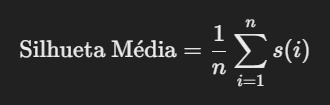

Interpreta√ß√£o dos Resultados

Silhueta pr√≥xima de 1: Clusters s√£o bem definidos; Cada ponto est√° bem dentro do seu cluster e distante de outros clusters.

Silhueta pr√≥xima de 0: Pontos est√£o na borda de clusters. Os clusters podem estar se sobrepondo.

Silhueta negativa: Indica clusters mal formados. Pontos est√£o mais pr√≥ximos de clusters vizinhos do que do seu pr√≥prio cluster.

Vantagens da T√©cnica da Silhueta

Simples de interpretar: Fornece um √∫nico n√∫mero para avaliar a qualidade de agrupamentos. Independente do algoritmo: Pode ser usada com qualquer t√©cnica de clustering. Diagn√≥stico de clusters: Ajuda a identificar pontos mal agrupados.

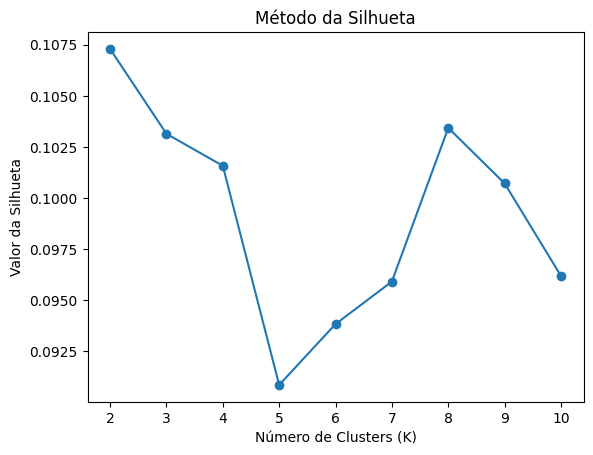

Melhor valor de K (M√©todo da Silhueta): 2


In [49]:
# Selecionar apenas as colunas com o sufixo "_minmax"
df_minmax = dataset[[col for col in dataset.columns if col.endswith('_minmax')]]
df_minmax = df_minmax.dropna()

# Lista para armazenar os valores de silhueta para diferentes valores de K
silhouette_avg = []

# Testar valores de K de 2 a 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_minmax)
    silhouette_avg.append(silhouette_score(df_minmax, cluster_labels))

# Plotar o gr√°fico da silhueta
plt.plot(range(2, 11), silhouette_avg, marker='o')
plt.title('M√©todo da Silhueta')
plt.xlabel('N√∫mero de Clusters (K)')
plt.ylabel('Valor da Silhueta')
plt.show()

# Encontrar o melhor valor de K (o valor de K que maximiza a silhueta)
best_k = np.argmax(silhouette_avg) + 2

print(f"Melhor valor de K (M√©todo da Silhueta): {best_k}")

Como funciona a t√©cnica do cotovelo

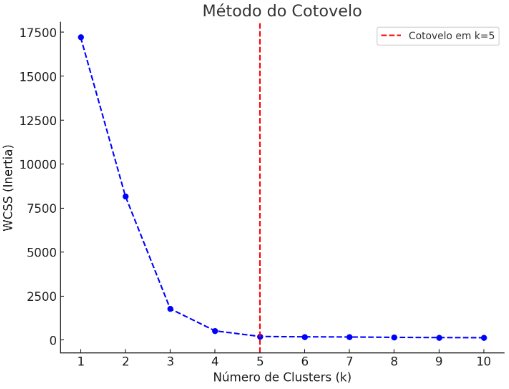

Escolher uma m√©trica de avalia√ß√£o: Normalmente, utiliza-se a Soma das Dist√¢ncias Quadr√°ticas Dentro dos Clusters (Within-Cluster Sum of Squares - WCSS), que mede a soma das dist√¢ncias dos pontos ao centro do cluster.

Executar o algoritmo para diferentes n√∫meros de clusters k: Calcular o WCSS para diferentes valores de k, geralmente come√ßando de 1 at√© um valor razo√°vel, como 10 ou 15.

Plotar o gr√°fico k√óWCSS: O eixo x representa o n√∫mero de clusters k. O eixo y representa o WCSS.

Identificar o "cotovelo": No gr√°fico, o ponto onde a curva come√ßa a "achatar" √© o ponto ideal. Este √© o n√∫mero de clusters onde adicionar mais clusters resulta em uma diminui√ß√£o marginal da variabilidade explicada. O cotovelo representa o ponto em que a soma das dist√¢ncias quadr√°ticas dentro dos clusters diminui de forma insignificante com o aumento de k, indicando que adicionar mais clusters n√£o est√° melhorando substancialmente a qualidade do agrupamento.

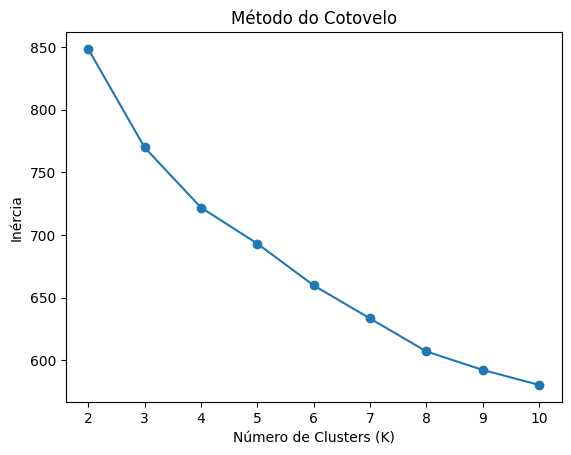

Melhor valor de K (M√©todo do Cotovelo): 2


In [50]:
# Selecionar apenas as colunas com o sufixo "_minmax"
df_minmax = dataset[[col for col in dataset.columns if col.endswith('_minmax')]]

# Lista para armazenar a in√©rcia para diferentes valores de K
inertia = []

# Testar valores de K de 2 a 10
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_minmax)
  inertia.append(kmeans.inertia_)

# Plotar o gr√°fico do cotovelo
plt.plot(range(2, 11), inertia, marker='o')
plt.title('M√©todo do Cotovelo')
plt.xlabel('N√∫mero de Clusters (K)')
plt.ylabel('In√©rcia')
plt.show()

# Encontrar o melhor valor de K (o ponto de inflex√£o no gr√°fico)
# Pode ser feito visualmente ou usando alguma t√©cnica de detec√ß√£o de inflex√£o
# Neste exemplo, vamos usar a visualiza√ß√£o para determinar o melhor K
# O melhor K parece ser 3, mas isso depende do gr√°fico gerado.
best_k = np.argmax(np.diff(inertia) * -1) + 2
print(f"Melhor valor de K (M√©todo do Cotovelo): {best_k}")

### Algoritmo de Clusteriza√ß√£o (KMeans)

In [51]:
# Definir os hiperpar√¢metros do KMeans
kmeans_params = {
    'n_clusters': best_k,  # N√∫mero de clusters (obtido pelo m√©todo do cotovelo ou silhueta)
    'init': 'k-means++',  # M√©todo de inicializa√ß√£o dos centroides
    'n_init': 100,  # N√∫mero de vezes que o algoritmo √© executado com diferentes inicializa√ß√µes
    'max_iter': 1000,  # N√∫mero m√°ximo de itera√ß√µes do algoritmo
    'tol': 1e-4,  # Toler√¢ncia para a converg√™ncia do algoritmo
    'random_state': 42  # Seed para a reprodutibilidade dos resultados
}

In [52]:
# Selecionar apenas as colunas com o sufixo "_minmax" para criar o modelo kmeans
df_minmax = dataset[[col for col in dataset.columns if col.endswith('_minmax')]]
df_minmax = df_minmax.dropna()

# Ajustar o modelo aos dados normalizados
kmeans = KMeans(**kmeans_params)  # Usando os hiperpar√¢metros definidos
kmeans.fit(df_minmax)

# Obter os r√≥tulos dos clusters para cada amostra
cluster_labels = kmeans.labels_

# Adicionar os r√≥tulos dos clusters ao dataset
dataset['cluster'] = cluster_labels

# Exibir os dados com os r√≥tulos dos clusters
print("Dataset com r√≥tulos de clusters:")
print(dataset.head().to_string())

Dataset com r√≥tulos de clusters:
   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto  Canal_Venda_encoded  Forma_Pagamento_encoded  Regiao_encoded  Categoria_Produto_encoded  ID_Venda_minmax  ID_Produto_minmax  Quantidade_minmax  Preco_Unitario_minmax  ID_Cliente_minmax  Valor_Total_minmax  Desconto_minmax  Frete_minmax  Canal_Venda_encoded_minmax  Forma_Pagamento_encoded_minmax  Regiao_encoded_minmax  Categoria_Produto_encoded_minmax       pc1       pc2  cluster
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis                    0                        2               3                          3         0.000000           0.686869           0.074324               0.062115           0.281281            0.070159         0.941137      0.16

In [53]:
# Contar a quantidade de exemplos por cluster
cluster_counts = dataset['cluster'].value_counts()

# Exibir os resultados
print("Quantidade de exemplos por cluster:")
cluster_counts

Quantidade de exemplos por cluster:


cluster
0    523
1    470
Name: count, dtype: int64

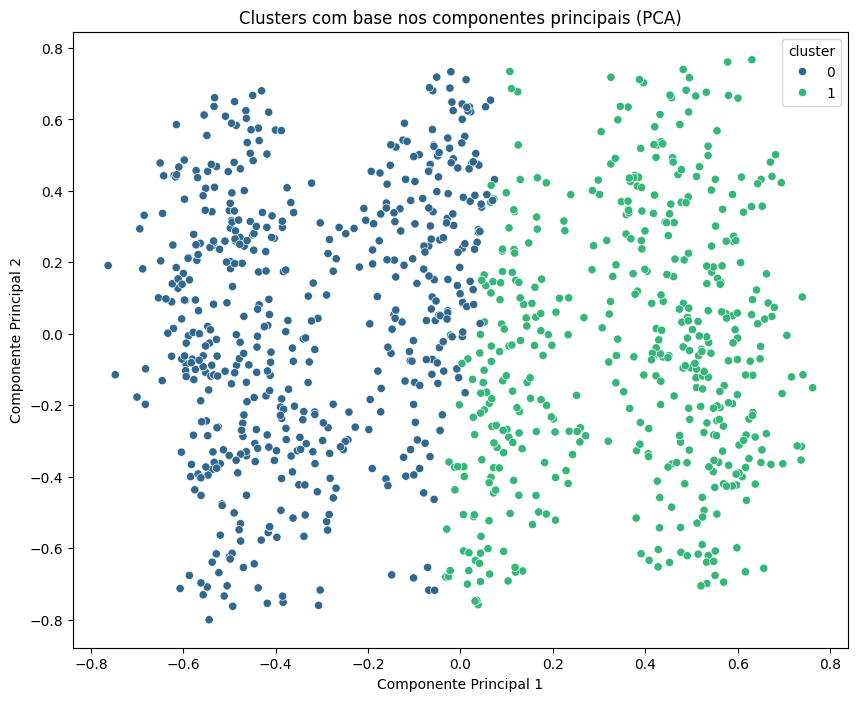

In [54]:
# Plotar o gr√°fico dos clusters com base nos componentes principais (PCA)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pc1', y='pc2', hue='cluster', data=dataset, palette='viridis')
plt.title('Clusters com base nos componentes principais (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [55]:
# Obter informa√ß√µes estat√≠sticas para cada cluster
for cluster_id in dataset['cluster'].unique():
  cluster_data = dataset[dataset['cluster'] == cluster_id]
  print(f"\nInforma√ß√µes do Cluster {cluster_id}:")
  print(cluster_data.describe().to_string())


Informa√ß√µes do Cluster 0:
          ID_Venda                     Data_Venda  ID_Produto  Quantidade  Preco_Unitario   ID_Cliente    Valor_Total    Desconto       Frete  Canal_Venda_encoded  Forma_Pagamento_encoded  Regiao_encoded  Categoria_Produto_encoded  ID_Venda_minmax  ID_Produto_minmax  Quantidade_minmax  Preco_Unitario_minmax  ID_Cliente_minmax  Valor_Total_minmax  Desconto_minmax  Frete_minmax  Canal_Venda_encoded_minmax  Forma_Pagamento_encoded_minmax  Regiao_encoded_minmax  Categoria_Produto_encoded_minmax         pc1         pc2  cluster
count   523.000000                            523  523.000000  523.000000      523.000000   523.000000     523.000000  523.000000  523.000000           523.000000               523.000000      523.000000                 523.000000       523.000000         523.000000         523.000000             523.000000         523.000000          523.000000       523.000000    523.000000                  523.000000                      523.000000    

## Etapa 10: Rotulagem

In [56]:
# Verificar se a coluna 'Venda' j√° existe no dataset
if 'Classe' not in dataset.columns:
  # Se n√£o existir, criar a coluna e atribuir valores iniciais (por exemplo, 'N/A')
  dataset['Classe'] = 'N/A'

# Atualizar a coluna 'Venda' com base nos clusters
dataset.loc[dataset['cluster'] == 0, 'Classe'] = 'B'
dataset.loc[dataset['cluster'] == 1, 'Classe'] = 'A'

# Exibir o dataset com a coluna 'Venda' atualizada
print("Dataset com a coluna 'Venda' atualizada:")
print(dataset.head().to_string())

Dataset com a coluna 'Venda' atualizada:
   ID_Venda Data_Venda  ID_Produto  Quantidade  Preco_Unitario  ID_Cliente  Valor_Total   Canal_Venda         Forma_Pagamento  Desconto  Frete        Regiao Categoria_Produto  Canal_Venda_encoded  Forma_Pagamento_encoded  Regiao_encoded  Categoria_Produto_encoded  ID_Venda_minmax  ID_Produto_minmax  Quantidade_minmax  Preco_Unitario_minmax  ID_Cliente_minmax  Valor_Total_minmax  Desconto_minmax  Frete_minmax  Canal_Venda_encoded_minmax  Forma_Pagamento_encoded_minmax  Regiao_encoded_minmax  Categoria_Produto_encoded_minmax       pc1       pc2  cluster Classe
0         1 2023-06-22         168        56.0          291.26        1281     11723.54  Distribuidor                Dinheiro     28.20  12.56       Sudeste            M√≥veis                    0                        2               3                          3         0.000000           0.686869           0.074324               0.062115           0.281281            0.070159         0.94

## Etapa 11: Prepara√ß√£o dos Dados para o Aprendizado de M√°quina

###  Balanceamento

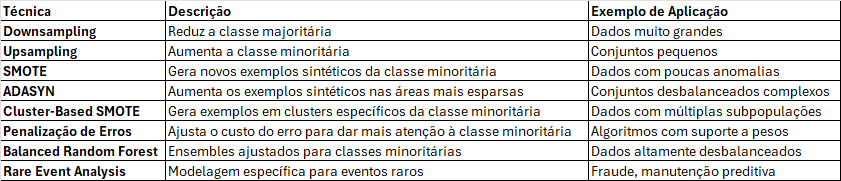

In [57]:
# Contar a quantidade de dados para cada classe
class_counts = dataset['Classe'].value_counts()
print("Quantidade de dados para cada classe:")
print(class_counts)

# Obter a classe minorit√°ria
minority_class = class_counts.idxmin()
# Obter a classe majorit√°ria
majority_class = class_counts.idxmax()

# Separar os dados em conjuntos de acordo com a classe
df_majority = dataset[dataset.Classe == majority_class]
df_minority = dataset[dataset.Classe == minority_class]

# Realizar o balanceamento por meio do m√©todo de reamostragem (upsampling/oversampling) da classe minorit√°ria
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Amostrar com reposi√ß√£o
                                 n_samples=len(df_majority),  # N√∫mero de amostras igual ao da classe majorit√°ria
                                 random_state=42)  # Seed para reprodutibilidade

# Combinar os dados majorit√°rios e os dados minorit√°rios reamostrados
datasetx = pd.concat([df_majority, df_minority_upsampled])

# Verificar se o balanceamento foi realizado com sucesso
print("Quantidade de dados para cada classe ap√≥s balanceamento:")
print(datasetx['Classe'].value_counts())

Quantidade de dados para cada classe:
Classe
B    523
A    470
Name: count, dtype: int64
Quantidade de dados para cada classe ap√≥s balanceamento:
Classe
B    523
A    523
Name: count, dtype: int64


### Regras

In [58]:
# Definir as regras de atribui√ß√£o para as colunas
column_rules = {
    datasetx.columns[0]: 'meta',  # Primeiro campo como meta
    'Classe': 'target',  # Coluna 'Classe' como target
    '*': 'feature'  # Todas as outras colunas como features
}

# Aplicar as regras √†s colunas do dataset
for column in dataset.columns:
  if column in column_rules:
    # Atribuir a regra espec√≠fica para a coluna
    datasetx.attrs[column] = column_rules[column]
  else:
    # Atribuir a regra padr√£o ('feature')
    datasetx.attrs[column] = column_rules['*']

# Exibir as regras de atribui√ß√£o
print("Regras de atribui√ß√£o para as colunas:")
for column in dataset.columns:
    print(f"{column}: {datasetx.attrs[column]}")

Regras de atribui√ß√£o para as colunas:
ID_Venda: meta
Data_Venda: feature
ID_Produto: feature
Quantidade: feature
Preco_Unitario: feature
ID_Cliente: feature
Valor_Total: feature
Canal_Venda: feature
Forma_Pagamento: feature
Desconto: feature
Frete: feature
Regiao: feature
Categoria_Produto: feature
Canal_Venda_encoded: feature
Forma_Pagamento_encoded: feature
Regiao_encoded: feature
Categoria_Produto_encoded: feature
ID_Venda_minmax: feature
ID_Produto_minmax: feature
Quantidade_minmax: feature
Preco_Unitario_minmax: feature
ID_Cliente_minmax: feature
Valor_Total_minmax: feature
Desconto_minmax: feature
Frete_minmax: feature
Canal_Venda_encoded_minmax: feature
Forma_Pagamento_encoded_minmax: feature
Regiao_encoded_minmax: feature
Categoria_Produto_encoded_minmax: feature
pc1: feature
pc2: feature
cluster: feature
Classe: target


### Sele√ß√£o das Dimens√µes

In [59]:
# Criar um novo dataset com apenas a coluna 'target' e as features com sufixo '_minmax'
datasetx_new = datasetx[['Classe'] + [col for col in datasetx.columns if col.endswith('_minmax')]].copy()

# Exibir o novo dataset
print("Novo dataset com target e features '_minmax':")
print(datasetx_new.head().to_string())

Novo dataset com target e features '_minmax':
   Classe  ID_Venda_minmax  ID_Produto_minmax  Quantidade_minmax  Preco_Unitario_minmax  ID_Cliente_minmax  Valor_Total_minmax  Desconto_minmax  Frete_minmax  Canal_Venda_encoded_minmax  Forma_Pagamento_encoded_minmax  Regiao_encoded_minmax  Categoria_Produto_encoded_minmax
0       B         0.000000           0.686869           0.074324               0.062115           0.281281            0.070159         0.941137      0.168037                         0.0                        0.666667                   0.75                              0.75
3       B         0.003003           0.939394           0.027027               0.039635           0.576577            0.017774         0.837458      0.597466                         0.5                        0.666667                   0.75                              1.00
8       B         0.008008           0.030303           0.108108               0.017698           0.528529            0.038223   

### Separa√ß√£o dos Dados para Treinamento/Teste e Valida√ß√£o

In [60]:
# Separar os dados em treino e teste (80/20)
X = datasetx_new.drop('Classe', axis=1)
y = datasetx_new['Classe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exibir o tamanho dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", len(X_train))
print(X_train.head().to_string())
print("Tamanho do conjunto de teste:", len(X_test))
print(X_test.head().to_string())

Tamanho do conjunto de treino: 836
     ID_Venda_minmax  ID_Produto_minmax  Quantidade_minmax  Preco_Unitario_minmax  ID_Cliente_minmax  Valor_Total_minmax  Desconto_minmax  Frete_minmax  Canal_Venda_encoded_minmax  Forma_Pagamento_encoded_minmax  Regiao_encoded_minmax  Categoria_Produto_encoded_minmax
772         0.772773           0.191919           0.054054               0.014605           0.900901            0.014525         0.707358      0.124472                         0.5                        0.666667                    0.0                              0.00
873         0.873874           0.898990           0.074276               0.095407           0.884885            0.081924         0.319732      0.796621                         1.0                        1.000000                    1.0                              0.00
8           0.008008           0.030303           0.108108               0.017698           0.528529            0.038223         0.419064      0.479218       

## Etapa 12: Escolha dos Hiperpar√¢metros dos Modelos

### Abordagem Neural ou Conexionista

[Explica√ß√£o do MLP:](https://youtu.be/oivb9285i54)

In [61]:
# Definir os hiperpar√¢metros para o modelo MultiLayer Perceptron
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # N√∫mero de neur√¥nios em cada camada oculta
    'activation': ['relu', 'tanh', 'logistic'],  # Fun√ß√£o de ativa√ß√£o
    'solver': ['adam', 'sgd'],  # Algoritmo de otimiza√ß√£o
    'alpha': [0.0001, 0.001, 0.01],  # Par√¢metro de regulariza√ß√£o L2
    'learning_rate': ['constant', 'adaptive'],  # Taxa de aprendizado
    'learning_rate_init': [0.001, 0.01],  # Taxa de aprendizado inicial
    'max_iter': [200, 500],  # N√∫mero m√°ximo de itera√ß√µes
    'random_state': [42]  # Seed para reprodutibilidade dos resultados
}

[Explica√ß√£o do CNN:](https://youtu.be/QM1kjB03cYk)

In [62]:
# Definir os hiperpar√¢metros para o modelo Convolutional Neural Network
cnn_params = {
    'filters': [32, 64, 128],  # N√∫mero de filtros em cada camada convolucional
    'kernel_size': [3, 5],  # Tamanho do kernel (n√∫cleo) da convolu√ß√£o
    'activation': ['relu'],  # Fun√ß√£o de ativa√ß√£o nas camadas convolucionais
    'pooling': ['max'],  # Tipo de pooling (max pooling ou average pooling)
    'dropout': [0.0, 0.2, 0.5],  # Taxa de dropout para regulariza√ß√£o
    'dense_units': [64, 128],  # N√∫mero de neur√¥nios na camada densa
    'optimizer': ['adam', 'rmsprop'],  # Otimizador para treinamento
    'loss': ['binary_crossentropy'],  # Fun√ß√£o de perda
    'metrics': ['accuracy'],  # M√©tricas para avalia√ß√£o
    'epochs': [10, 20, 30],  # N√∫mero de √©pocas de treinamento
    'batch_size': [32, 64, 128],  # Tamanho do lote para treinamento
}

[Explica√ß√£o das GenAIs:](https://youtu.be/jzQhtxMKDQU)

In [63]:
# Definir os hiperpar√¢metros para o modelo Redes Autoencoders
ae_params = {
    'input_dim': X_train.shape[1],  # Dimens√£o da entrada (n√∫mero de features)
    'hidden_layers': [64, 32, 16],  # N√∫mero de neur√¥nios em cada camada oculta
    'latent_dim': 8,  # Dimens√£o do espa√ßo latente (tamanho do c√≥digo)
    'activation': 'relu',  # Fun√ß√£o de ativa√ß√£o das camadas ocultas
    'optimizer': 'adam',  # Otimizador para treinamento
    'loss': 'mse',  # Fun√ß√£o de perda (erro quadr√°tico m√©dio)
    'epochs': 100,  # N√∫mero de √©pocas de treinamento
    'batch_size': 32,  # Tamanho do lote para treinamento
}

### Abordagem em √Årvore

[Explica√ß√£o do TD:](https://youtu.be/cbL1u4z4N3M)

In [64]:
# Definir os hiperpar√¢metros para o modelo Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],  # Fun√ß√£o para medir a qualidade da divis√£o
    'splitter': ['best', 'random'],  # Estrat√©gia para escolher a divis√£o em cada n√≥
    'max_depth': [None, 5, 10, 15, 20],  # Profundidade m√°xima da √°rvore
    'min_samples_split': [2, 5, 10],  # N√∫mero m√≠nimo de amostras necess√°rias para dividir um n√≥ interno
    'min_samples_leaf': [1, 2, 4],  # N√∫mero m√≠nimo de amostras necess√°rias em cada folha
    'max_features': [None, 'sqrt', 'log2'],  # N√∫mero de features a serem consideradas para cada divis√£o
    'random_state': [42]  # Seed para reprodutibilidade dos resultados
}

[Explica√ß√£o do RF:](https://youtu.be/ByUoVg4QI84)

In [65]:
# Definir os hiperpar√¢metros para o modelo Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],  # N√∫mero de √°rvores na floresta
    'criterion': ['gini', 'entropy'],  # Fun√ß√£o para medir a qualidade da divis√£o
    'max_depth': [None, 10, 20, 30],  # Profundidade m√°xima da √°rvore
    'min_samples_split': [2, 5, 10],  # N√∫mero m√≠nimo de amostras para dividir um n√≥
    'min_samples_leaf': [1, 2, 4],  # N√∫mero m√≠nimo de amostras em uma folha
    'max_features': ['auto', 'sqrt', 'log2'],  # N√∫mero m√°ximo de features a serem consideradas para dividir um n√≥
    'bootstrap': [True, False],  # Usar bootstrap para criar as amostras para as √°rvores
    'class_weight': ['balanced', None],  # Tratamento de classes desbalanceadas
    'random_state': [42]  # Seed para reprodutibilidade dos resultados
}

In [66]:
# Definir os hiperpar√¢metros para o modelo Light Gradient Boosting Machine
lgbm_params = {
    'learning_rate': [0.01, 0.1, 0.2],  # Taxa de aprendizado
    'n_estimators': [50, 100, 200],  # N√∫mero de estimadores (√°rvores)
    'max_depth': [3, 5, 7],  # Profundidade m√°xima da √°rvore
    'num_leaves': [31, 63, 127],  # N√∫mero m√°ximo de folhas em cada √°rvore
    'boosting_type': ['gbdt', 'dart'],  # Tipo de boosting
    'objective': ['binary'],  # Fun√ß√£o objetivo (classifica√ß√£o bin√°ria)
    'metric': ['binary_logloss', 'auc'],  # M√©tricas para avaliar o modelo
    'subsample': [0.8, 1.0],  # Fra√ß√£o de amostras usadas para treinamento de cada √°rvore
    'colsample_bytree': [0.8, 1.0],  # Fra√ß√£o de features usadas para treinamento de cada √°rvore
    'reg_alpha': [0, 0.1, 0.5],  # Regulariza√ß√£o L1
    'reg_lambda': [0, 0.1, 0.5],  # Regulariza√ß√£o L2
    'random_state': [42]  # Seed para reprodutibilidade dos resultados
}

### Abordagem Estat√≠stica

[Explica√ß√£o do SVM:](https://youtu.be/UrR5tcY-wYw)

In [67]:
# Definir os hiperpar√¢metros para o modelo Support Vector Machine
svm_params = {
    'C': [0.1, 1, 10, 100],  # Par√¢metro de regulariza√ß√£o
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Tipo de kernel
    'gamma': ['scale', 'auto'],  # Par√¢metro do kernel RBF, polinomial e sigmoid
    'degree': [2, 3, 4],  # Grau do kernel polinomial
    'class_weight': ['balanced', None],  # Tratamento de classes desbalanceadas
}

[Explica√ß√£o do KNN:](https://youtu.be/oafK8OGu_Vk)

In [68]:
# Definir os hiperpar√¢metros para o modelo K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],  # N√∫mero de vizinhos mais pr√≥ximos
    'weights': ['uniform', 'distance'],  # Tipo de pondera√ß√£o dos vizinhos
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo para calcular os vizinhos mais pr√≥ximos
    'leaf_size': [10, 20, 30, 40],  # Tamanho das folhas para ball_tree e kd_tree
    'p': [1, 2]  # Par√¢metro da m√©trica de dist√¢ncia (1 para dist√¢ncia de Manhattan, 2 para dist√¢ncia euclidiana)
}

[Explica√ß√£o do LOR:](https://youtu.be/zFdVFTd-Y50)

In [69]:
# Definir os hiperpar√¢metros para o modelo Logistic Regression
lor_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Tipo de regulariza√ß√£o
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Par√¢metro de regulariza√ß√£o (inverso da for√ßa da regulariza√ß√£o)
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algoritmo para otimiza√ß√£o
    'max_iter': [100, 200, 300],  # N√∫mero m√°ximo de itera√ß√µes
    'multi_class': ['auto', 'ovr', 'multinomial'],  # M√©todo para lidar com problemas multiclasse
}

### Otimiza√ß√£o dos Hiperpar√¢metros

In [70]:
# Criar um dicion√°rio com os modelos e seus hiperpar√¢metros correspondentes
#models = {
#    'MLP': (MLPClassifier(), mlp_params),
#    'DT': (DecisionTreeClassifier(), dt_params),
#    'RF': (RandomForestClassifier(), rf_params),
#    'LGBM': (LGBMClassifier(), lgbm_params),
#    'SVM': (SVC(), svm_params),
#    'KNN': (KNeighborsClassifier, knn_params),
#    'LOR': (LogisticRegression(), lor_params)
#}

# Criar um dicion√°rio com os modelos e seus hiperpar√¢metros correspondentes
models = {
    'MLP': (MLPClassifier(), mlp_params),
    'RF': (RandomForestClassifier(), rf_params),
    'SVM': (SVC(), svm_params)
}

# Definir a estrat√©gia de valida√ß√£o cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Loop para otimizar os hiperpar√¢metros de cada modelo
for model_name, (model, params) in models.items():
    print(f"Otimizando hiperpar√¢metros para o modelo: {model_name}")

    # Criar o objeto GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='accuracy', n_jobs=-1)

    # Ajustar o GridSearchCV aos dados de treinamento
    grid_search.fit(X_train, y_train)

    # Imprimir os melhores hiperpar√¢metros encontrados
    print(f"Melhores hiperpar√¢metros para {model_name}: {grid_search.best_params_}")

    # Avaliar o modelo com os melhores hiperpar√¢metros no conjunto de teste
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calcular as m√©tricas de avalia√ß√£o
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"M√©tricas para {model_name} com melhores hiperpar√¢metros:")
    print(f"Acur√°cia: {accuracy:.4f}")
    print(f"Precis√£o: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Salvar o modelo com os melhores hiperpar√¢metros (opcional)
    filename = f'{model_name}_best_model.pkl'
    pickle.dump(best_model, open(filename, 'wb'))

Otimizando hiperpar√¢metros para o modelo: MLP


KeyboardInterrupt: 

## Etapa 13: Competi√ß√£o de Modelos

### Multilayer Perceptron (MLP)

In [71]:
# Criar um modelo MLP com hiperpar√¢metros espec√≠ficos
mlp_model = MLPClassifier(
    hidden_layer_sizes=(32,16),  # N√∫mero de neur√¥nios em cada camada oculta
    activation='relu',  # Fun√ß√£o de ativa√ß√£o
    solver='adam',  # Algoritmo de otimiza√ß√£o
    alpha=0.0001,  # Termo de regulariza√ß√£o L2
    batch_size='auto',  # Tamanho do batch para o treinamento
    learning_rate='constant',  # Taxa de aprendizado
    learning_rate_init=0.001,  # Taxa de aprendizado inicial
    power_t=0.5,  # Par√¢metro para o algoritmo de otimiza√ß√£o 'sgd'
    max_iter=200,  # N√∫mero m√°ximo de itera√ß√µes
    shuffle=True,  # Embaralhar os dados a cada √©poca
    random_state=None,  # Semente aleat√≥ria
    tol=0.0001,  # Toler√¢ncia para o crit√©rio de parada
    verbose=False,  # Mostrar mensagens durante o treinamento
    warm_start=False,  # Reutilizar a solu√ß√£o da inicializa√ß√£o anterior
    momentum=0.9,  # Par√¢metro para o algoritmo de otimiza√ß√£o 'sgd'
    nesterovs_momentum=True,  # Utilizar o momentum de Nesterov
    early_stopping=False,  # Parar o treinamento precocemente
    validation_fraction=0.1,  # Fra√ß√£o de dados para valida√ß√£o
    beta_1=0.9,  # Par√¢metro para o algoritmo de otimiza√ß√£o 'adam'
    beta_2=0.999,  # Par√¢metro para o algoritmo de otimiza√ß√£o 'adam'
    epsilon=1e-08,  # Par√¢metro para o algoritmo de otimiza√ß√£o 'adam'
    n_iter_no_change=10,  # N√∫mero m√°ximo de √©pocas sem melhoria
    max_fun=1000  # N√∫mero m√°ximo de chamadas para a fun√ß√£o de custo
)

# Exibir os hiperpar√¢metros
print("Hiperpar√¢metros do modelo MLP:")
print(mlp_model.get_params())

Hiperpar√¢metros do modelo MLP:
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (32, 16), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 1000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [72]:
# Treinar e avaliar o modelo com valida√ß√£o cruzada
cv_scores = cross_val_score(mlp_model, X_train, y_train, cv=3, scoring='accuracy')

# Imprimir os resultados da valida√ß√£o cruzada
print("Resultados da valida√ß√£o cruzada para o modelo:")
print("Acur√°cia para cada fold:", cv_scores)
print("Acur√°cia m√©dia:", cv_scores.mean())
print("Desvio padr√£o da acur√°cia:", cv_scores.std())

# Treinar o modelo com os dados de treinamento completos
mlp_model.fit(X_train, y_train)

# Fazer previs√µes com o modelo no conjunto de teste
y_pred_mlp = mlp_model.predict(X_test)

# Calcular as m√©tricas de avalia√ß√£o para o modelo
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Resultados da valida√ß√£o cruzada para o modelo:
Acur√°cia para cada fold: [0.99283154 0.98924731 0.99280576]
Acur√°cia m√©dia: 0.9916282028140929
Desvio padr√£o da acur√°cia: 0.001683577073389385


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Light Gradient Boosting Machine (LGBM)

In [73]:
# Criar um modelo LGBM com hiperpar√¢metros espec√≠ficos
lgbm_model = LGBMClassifier(
    learning_rate=0.1,  # Taxa de aprendizado
    n_estimators=100,  # N√∫mero de estimadores (√°rvores)
    max_depth=7,  # Profundidade m√°xima da √°rvore
    num_leaves=127,  # N√∫mero m√°ximo de folhas em cada √°rvore
    boosting_type='gbdt',  # Tipo de boosting
    objective='binary',  # Fun√ß√£o objetivo (classifica√ß√£o bin√°ria)
    metric='binary_logloss',  # M√©tricas para avaliar o modelo
    subsample=0.8,  # Fra√ß√£o de amostras usadas para treinamento de cada √°rvore
    colsample_bytree=0.8,  # Fra√ß√£o de features usadas para treinamento de cada √°rvore
    reg_alpha=0.1,  # Regulariza√ß√£o L1
    reg_lambda=0.1,  # Regulariza√ß√£o L2
    random_state=42  # Seed para reprodutibilidade dos resultados
)

# Exibir os hiperpar√¢metros
print("Hiperpar√¢metros do modelo LGBM:")
print(lgbm_model.get_params())

Hiperpar√¢metros do modelo LGBM:
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 7, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 127, 'objective': 'binary', 'random_state': 42, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.8, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'metric': 'binary_logloss'}


In [74]:
# Treinar e avaliar o modelo com valida√ß√£o cruzada
cv_scores = cross_val_score(lgbm_model, X_train, y_train, cv=3, scoring='accuracy')

# Imprimir os resultados da valida√ß√£o cruzada
print("Resultados da valida√ß√£o cruzada para o modelo LGBM:")
print("Acur√°cia para cada fold:", cv_scores)
print("Acur√°cia m√©dia:", cv_scores.mean())
print("Desvio padr√£o da acur√°cia:", cv_scores.std())

# Treinar o modelo com os dados de treinamento completos
lgbm_model.fit(X_train, y_train)

# Fazer previs√µes com o modelo no conjunto de teste
y_pred_lgbm = lgbm_model.predict(X_test)

# Calcular as m√©tricas de avalia√ß√£o para o modelo
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='weighted')

[LightGBM] [Info] Number of positive: 279, number of negative: 278
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1307
[LightGBM] [Info] Number of data points in the train set: 557, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500898 -> initscore=0.003591
[LightGBM] [Info] Start training from score 0.003591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### Support Vector Machine (SVM)

In [75]:
# Criar modelo SVM com hiperpar√¢metros espec√≠ficos
svm_model = SVC(
    C=1.0,  # Par√¢metro de regulariza√ß√£o (custo da classifica√ß√£o incorreta)
    kernel='rbf',  # Kernel para o modelo (radial basis function)
    degree=3,  # Grau do polin√¥mio para o kernel (relevante para kernel='poly')
    gamma='scale',  # Coeficiente do kernel (relevante para kernel='rbf', 'poly', 'sigmoid')
    coef0=0.0,  # Termo independente para o kernel (relevante para kernel='poly', 'sigmoid')
    shrinking=True,  # Utiliza√ß√£o do shrinking heuristic para otimizar a solu√ß√£o
    probability=False,  # Calcular probabilidades de classe
    tol=0.001,  # Toler√¢ncia para a otimiza√ß√£o
    cache_size=200,  # Tamanho do cache em MB
    class_weight=None,  # Pesos para as classes (pode ser usado para lidar com classes desbalanceadas)
    verbose=False,  # Mostrar mensagens durante a execu√ß√£o
    max_iter=200,  # N√∫mero m√°ximo de itera√ß√µes para a otimiza√ß√£o (-1 significa ilimitado)
    decision_function_shape='ovr',  # Formato da fun√ß√£o de decis√£o ('ovo' para one-vs-one, 'ovr' para one-vs-rest)
    break_ties=False,  # Quebrar empates com maior precis√£o (relevante para classifica√ß√£o multiclasse)
    random_state=None  # Semente aleat√≥ria para reprodutibilidade
)

# Exibir os hiperpar√¢metros
print("Hiperpar√¢metros do modelo SVM:")
print(svm_model.get_params())

Hiperpar√¢metros do modelo SVM:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 200, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [76]:
# Treinar e avaliar o modelo com valida√ß√£o cruzada
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=3, scoring='accuracy')

# Imprimir os resultados da valida√ß√£o cruzada
print("Resultados da valida√ß√£o cruzada para o modelo:")
print("Acur√°cia para cada fold:", cv_scores)
print("Acur√°cia m√©dia:", cv_scores.mean())
print("Desvio padr√£o da acur√°cia:", cv_scores.std())

# Treinar o modelo com os dados de treinamento completos
svm_model.fit(X_train, y_train)

# Fazer previs√µes com o modelo no conjunto de teste
y_pred_svm = svm_model.predict(X_test)

# Calcular as m√©tricas de avalia√ß√£o para o modelo
accuracy_svm = accuracy_score(y_test, y_pred_mlp)
precision_svm = precision_score(y_test, y_pred_mlp, average='weighted')
recall_svm = recall_score(y_test, y_pred_mlp, average='weighted')
f1_svm = f1_score(y_test, y_pred_mlp, average='weighted')

Resultados da valida√ß√£o cruzada para o modelo:
Acur√°cia para cada fold: [0.98566308 0.97849462 0.98561151]
Acur√°cia m√©dia: 0.9832564056281856
Desvio padr√£o da acur√°cia: 0.0033671541467787175


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


### Avalia√ß√£o das M√©tricas

In [77]:
# Imprimir as m√©tricas de avalia√ß√£o para o modelo
print("\nM√©tricas de avalia√ß√£o para o modelo MLP:")
print("Acur√°cia:", accuracy_mlp)
print("Precis√£o:", precision_mlp)
print("Revoca√ß√£o:", recall_mlp)
print("Mensura√ßao:", f1_mlp)

# Imprimir as m√©tricas de avalia√ß√£o para o modelo
print("\nM√©tricas de avalia√ß√£o para o modelo LGBM:")
print("Acur√°cia:", accuracy_lgbm)
print("Precis√£o:", precision_lgbm)
print("Revoca√ß√£o:", recall_lgbm)
print("Mensura√ßao:", f1_lgbm)

# Imprimir as m√©tricas de avalia√ß√£o para o modelo
print("\nM√©tricas de avalia√ß√£o para o modelo SVM:")
print("Acur√°cia:", accuracy_svm)
print("Precis√£o:", precision_svm)
print("Revoca√ß√£o:", recall_svm)
print("Mensura√ßao:", f1_svm)


M√©tricas de avalia√ß√£o para o modelo MLP:
Acur√°cia: 0.9857142857142858
Precis√£o: 0.9857583454281568
Revoca√ß√£o: 0.9857142857142858
Mensura√ßao: 0.9857139617678404

M√©tricas de avalia√ß√£o para o modelo LGBM:
Acur√°cia: 0.9809523809523809
Precis√£o: 0.9811269394791761
Revoca√ß√£o: 0.9809523809523809
Mensura√ßao: 0.9809506531204645

M√©tricas de avalia√ß√£o para o modelo SVM:
Acur√°cia: 0.9857142857142858
Precis√£o: 0.9857583454281568
Revoca√ß√£o: 0.9857142857142858
Mensura√ßao: 0.9857139617678404


In [78]:
# Criar um DataFrame para armazenar as m√©tricas de cada modelo
metricas_modelos = pd.DataFrame({
    'Modelo': ['MLP', 'LGBM', 'SVM'],
    'Acur√°cia': [accuracy_mlp, accuracy_lgbm, accuracy_svm],
    'Precis√£o': [precision_mlp, precision_lgbm, precision_svm],
    'Revoca√ß√£o': [recall_mlp, recall_lgbm, recall_svm],
    'Mensura√ß√£o': [f1_mlp, f1_lgbm, f1_svm]
})

# Exibir as m√©tricas de cada modelo
print("\nM√©tricas dos Modelos:")
print(metricas_modelos)

# Encontrar o modelo com a maior acur√°cia
melhor_modelo_acuracia = metricas_modelos.loc[metricas_modelos['Acur√°cia'].idxmax()]
print(f"\nMelhor modelo com base na Acur√°cia: {melhor_modelo_acuracia['Modelo']}")

# Encontrar o modelo com o maior Precis√£o
melhor_modelo_precisao = metricas_modelos.loc[metricas_modelos['Precis√£o'].idxmax()]
print(f"\nMelhor modelo com base no Precis√£o: {melhor_modelo_precisao['Modelo']}")

# Encontrar o modelo com o maior Revoca√ß√£o
melhor_modelo_revocacao = metricas_modelos.loc[metricas_modelos['Revoca√ß√£o'].idxmax()]
print(f"\nMelhor modelo com base no Revoca√ß√£o: {melhor_modelo_precisao['Modelo']}")

# Encontrar o modelo com o maior Mensura√ß√£o
melhor_modelo_mensuracao = metricas_modelos.loc[metricas_modelos['Mensura√ß√£o'].idxmax()]
print(f"\nMelhor modelo com base no Mensura√ß√£o: {melhor_modelo_mensuracao['Modelo']}")

# Avaliar o melhor modelo com base em m√∫ltiplas m√©tricas (exemplo: m√©dia ponderada de Acur√°cia e F1-Score)
metricas_modelos['Pontuacao_Media'] = (metricas_modelos['Acur√°cia'] + metricas_modelos['Precis√£o']  + metricas_modelos['Revoca√ß√£o'] + metricas_modelos['Mensura√ß√£o']) / 4
melhor_modelo_media = metricas_modelos.loc[metricas_modelos['Pontuacao_Media'].idxmax()]
print(f"\nMelhor modelo com base na m√©dia ponderada de Acur√°cia, Precis√£o, Revoca√ß√£o e Mensura√ß√£o: {melhor_modelo_media['Modelo']}")



M√©tricas dos Modelos:
  Modelo  Acur√°cia  Precis√£o  Revoca√ß√£o  Mensura√ß√£o
0    MLP  0.985714  0.985758   0.985714    0.985714
1   LGBM  0.980952  0.981127   0.980952    0.980951
2    SVM  0.985714  0.985758   0.985714    0.985714

Melhor modelo com base na Acur√°cia: MLP

Melhor modelo com base no Precis√£o: MLP

Melhor modelo com base no Revoca√ß√£o: MLP

Melhor modelo com base no Mensura√ß√£o: MLP

Melhor modelo com base na m√©dia ponderada de Acur√°cia, Precis√£o, Revoca√ß√£o e Mensura√ß√£o: MLP


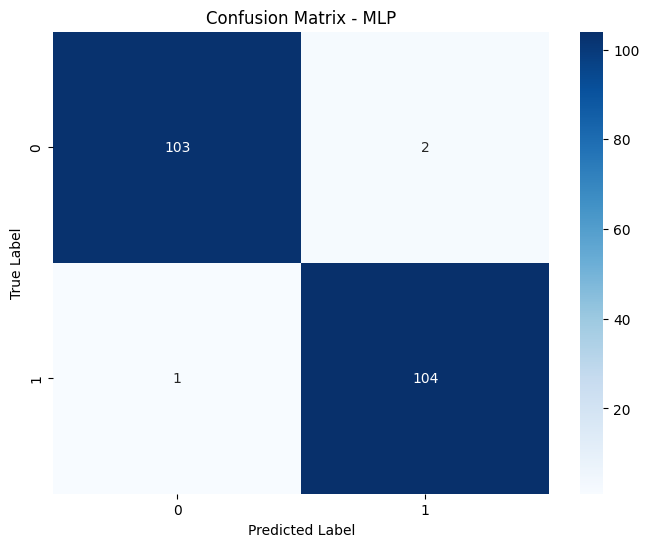

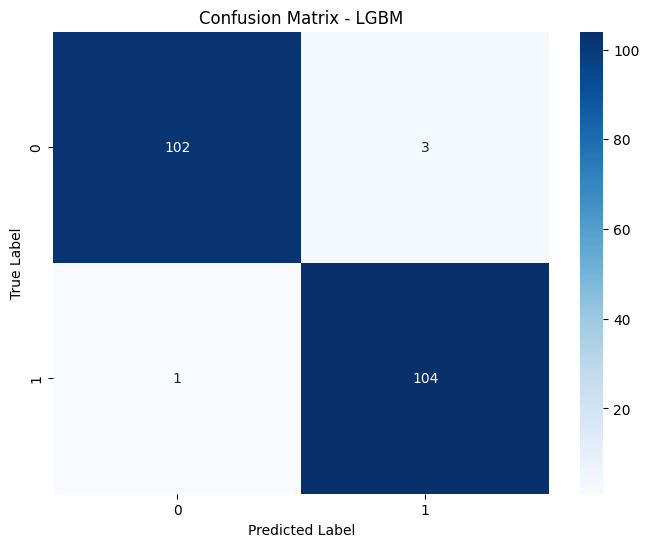

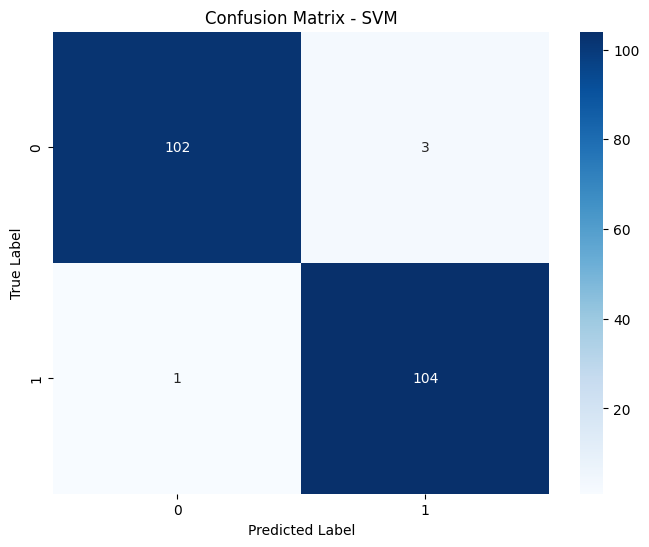

In [79]:
# Gerar matrizes de confus√£o para cada modelo
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Fun√ß√£o para plotar matriz de confus√£o
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Matrizes de confus√£o de plotagem para cada modelo
plot_confusion_matrix(cm_mlp, 'MLP')
print()
plot_confusion_matrix(cm_lgbm, 'LGBM')
print()
plot_confusion_matrix(cm_svm, 'SVM')

### Salvar Modelo Campe√£o

In [80]:
# Salvar o modelo campe√£o treinado
filename = 'model.pkl'
pickle.dump(mlp_model, open(filename, 'wb'))

## Etapa 14: Produ√ß√£o (Deploy)

### Modelo

In [81]:
# Carregar o modelo salvo
filename = 'model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

### Validando o modelo

M√©tricas do modelo carregado:
Acur√°cia: 0.9857
Precis√£o: 0.9858
Recall: 0.9857
F1-Score: 0.9857


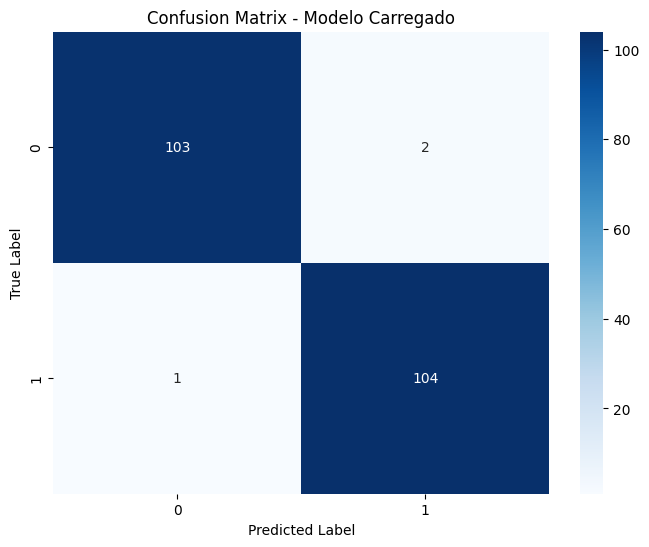

In [82]:
# Carregar o modelo salvo (substitua 'model.pkl' pelo nome do arquivo do seu modelo)
filename = 'model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

# Fazer previs√µes com o modelo carregado no conjunto de teste
y_pred = loaded_model.predict(X_test)

# Calcular as m√©tricas de avalia√ß√£o
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("M√©tricas do modelo carregado:")
print(f"Acur√°cia: {accuracy:.4f}")
print(f"Precis√£o: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Gerar a matriz de confus√£o
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confus√£o (opcional)
plot_confusion_matrix(cm, 'Modelo Carregado')